In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

import rdkit
from rdkit import Chem, DataStructs
from rdkit.Chem import Draw, rdmolops, AllChem, Descriptors


In [2]:
def hist_plot(data, label, xticks, yticks, xlabel, yscale):
    fig, ax = plt.subplots(figsize=(10,6), dpi=300)
    xmax=data[label].max()
    xmin=data[label].min()
    interval=(xmax-xmin)/70.
    n, bins, patches = plt.hist(data[label], bins=np.arange(xmin,xmax,interval)
                                , color='#809bce'
                                , edgecolor='black', linewidth=1.5, density = False )
    ax.tick_params(direction='in', width=2)
    ax.tick_params(axis='x', pad=10)
    ax.tick_params(axis='y', pad=10)
    
    for spine in ax.spines.values():
        spine.set_linewidth(2)
        
    plt.xlabel(xlabel, fontsize=38, font="arial", labelpad=12)
    plt.ylabel('Count', fontsize=38, font="arial", labelpad=12)
    plt.xticks(xticks, fontsize=26)
    plt.yticks(yticks, fontsize=26)
    plt.gca().tick_params(axis='both', length=10, width=2)

#     plt.xlim(xscale[0], xscale[1])
    plt.ylim(yscale[0], yscale[1])
    plt.show()


In [3]:
def svg_plot(foldername, df_contains):
    os.makedirs(foldername, exist_ok=True)

    c_smiles = df_contains['c_smiles'].to_list()
    # len(c_smiles)
    idx_list = df_contains.index.to_list()
    # idx_list[1]

    interval = 40
    # 创建一个绘图选项对象
    options = Draw.MolDrawOptions()
    options.legendFontSize = 30
    for i in range(0,len(c_smiles),interval):
        if (i+interval) <= len(c_smiles):
            sample_smiles = c_smiles[i:i+interval]
        else:
            sample_smiles = c_smiles[i:len(c_smiles)]
        sample_mols = [Chem.MolFromSmiles(smiles) for smiles in sample_smiles]
    #     label = idx_list[i:i+40]
        label = list(map(str, idx_list[i:i+40]))
        grid = Draw.MolsToGridImage(sample_mols,
                                   molsPerRow=5,
                                   subImgSize=(700,700),
                                    legends = label,
                                    drawOptions=options,
                                   useSVG=True
                                   )
    # grid
        path = foldername+'/donor-' + str(i+1) +'.svg'
        with open(path, 'w') as f_handle:
            f_handle.write(grid.data)

In [4]:
# 定义一个函数，用于检查每个SMILES字符串是否包含噻吩环
def contains_frag(smiles_string):
    molecule = Chem.MolFromSmiles(smiles_string)
#     ddp = 'CN1C=C2C(=O)N(C)C=C2C1=O'
    fragment_smiles=block_cs
    fragment_molecule = Chem.MolFromSmiles(fragment_smiles)
    return molecule.HasSubstructMatch(fragment_molecule)

In [5]:
df = pd.read_csv('./raw/atom_number_wH_sort_1115-backbone-correction-newSMILES.csv')
df

,Nickname,bandgap(eV),c_smiles,newSMILES,Ref.No
0,P3HT,1.93,CCCCCCc1cc(C)sc1C,Cc1cc(C)c(s1)-c1cc(C)c(s1)-c1cc(C)c(s1)-c1cc(C...,S10
1,P3HST,1.82,CCCCCCSc1cc(C)sc1C,CSc1cc(sc1C)-c1sc(cc1SC)-c1sc(cc1SC)-c1sc(cc1S...,S123
2,POPT,1.76,CCCCCCCCc1ccc(-c2cc(C)sc2C)cc1,Cc1cc(c(s1)-c1cc(c(s1)-c1cc(c(s1)-c1cc(c(s1)-c...,S126
3,PT-C1,1.92,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(C)s1,COC(=O)c1cc(C)sc1-c1ccc(s1)-c1cc(C(=O)OC)c(s1)...,S122
4,PT-C2,1.89,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(-c2ccc(C)s2)s1,COC(=O)c1cc(C)sc1-c1ccc(s1)-c1ccc(s1)-c1cc(C(=...,S122
...,...,...,...,...,...
1110,BTT-NTz,1.68,CCCCCCCCCCCCc1cc(C)sc1-c1cc2c3sc(C(CCCCCCCC)CC...,Cc1cc(C)c(s1)-c1cc2c3sc(C)cc3c3cc(sc3c2s1)-c1s...,S115
1111,PIDTI-BT,1.65,CCCCCCCCCCCCC(CCCCCCCCCC)Cn1c2cc3c(cc2c2sc(C)c...,Cc1cc2n(C)c3cc4-c5cc6c(cc5C(c4cc3c2s1)(c1ccccc...,S441
1112,PIDTI-DTBT,1.66,CCCCCCCCCCCCC(CCCCCCCCCC)Cn1c2cc3c(cc2c2sc(C)c...,Cc1ccc(s1)-c1ccc(-c2ccc(s2)-c2cc3n(C)c4cc5-c6c...,S441
1113,poly(DPP4T-alt-TBP),1.52,CCCCCCCCCCCCC(CCCCCCCCCC)CN1C(=O)C2=C(c3ccc(-c...,CN1C(=O)C2=C(N(C)C(=O)C2=C1c1ccc(C)s1)c1ccc(s1...,S464


# drop sp3-N polymers + donor-692

In [6]:
sp3_N_list = [  24,   44,  191,  201,  206,  209,  251,  317,  318,  332,  374,
             381,  388,  454,  913,  931,  936, 1006]
drop_list = sp3_N_list+[691]
print('Total data points: ', 1115-len(drop_list))

Total data points:  1096


In [7]:
df = df[~df.index.isin(drop_list)].reset_index(drop=True)
df

,Nickname,bandgap(eV),c_smiles,newSMILES,Ref.No
0,P3HT,1.93,CCCCCCc1cc(C)sc1C,Cc1cc(C)c(s1)-c1cc(C)c(s1)-c1cc(C)c(s1)-c1cc(C...,S10
1,P3HST,1.82,CCCCCCSc1cc(C)sc1C,CSc1cc(sc1C)-c1sc(cc1SC)-c1sc(cc1SC)-c1sc(cc1S...,S123
2,POPT,1.76,CCCCCCCCc1ccc(-c2cc(C)sc2C)cc1,Cc1cc(c(s1)-c1cc(c(s1)-c1cc(c(s1)-c1cc(c(s1)-c...,S126
3,PT-C1,1.92,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(C)s1,COC(=O)c1cc(C)sc1-c1ccc(s1)-c1cc(C(=O)OC)c(s1)...,S122
4,PT-C2,1.89,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(-c2ccc(C)s2)s1,COC(=O)c1cc(C)sc1-c1ccc(s1)-c1ccc(s1)-c1cc(C(=...,S122
...,...,...,...,...,...
1091,BTT-NTz,1.68,CCCCCCCCCCCCc1cc(C)sc1-c1cc2c3sc(C(CCCCCCCC)CC...,Cc1cc(C)c(s1)-c1cc2c3sc(C)cc3c3cc(sc3c2s1)-c1s...,S115
1092,PIDTI-BT,1.65,CCCCCCCCCCCCC(CCCCCCCCCC)Cn1c2cc3c(cc2c2sc(C)c...,Cc1cc2n(C)c3cc4-c5cc6c(cc5C(c4cc3c2s1)(c1ccccc...,S441
1093,PIDTI-DTBT,1.66,CCCCCCCCCCCCC(CCCCCCCCCC)Cn1c2cc3c(cc2c2sc(C)c...,Cc1ccc(s1)-c1ccc(-c2ccc(s2)-c2cc3n(C)c4cc5-c6c...,S441
1094,poly(DPP4T-alt-TBP),1.52,CCCCCCCCCCCCC(CCCCCCCCCC)CN1C(=O)C2=C(c3ccc(-c...,CN1C(=O)C2=C(N(C)C(=O)C2=C1c1ccc(C)s1)c1ccc(s1...,S464


## 1. BT: benzothiadiazole and its derivatives

In [8]:
df['bt'] = 0
df

,Nickname,bandgap(eV),c_smiles,newSMILES,Ref.No,bt
0,P3HT,1.93,CCCCCCc1cc(C)sc1C,Cc1cc(C)c(s1)-c1cc(C)c(s1)-c1cc(C)c(s1)-c1cc(C...,S10,0
1,P3HST,1.82,CCCCCCSc1cc(C)sc1C,CSc1cc(sc1C)-c1sc(cc1SC)-c1sc(cc1SC)-c1sc(cc1S...,S123,0
2,POPT,1.76,CCCCCCCCc1ccc(-c2cc(C)sc2C)cc1,Cc1cc(c(s1)-c1cc(c(s1)-c1cc(c(s1)-c1cc(c(s1)-c...,S126,0
3,PT-C1,1.92,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(C)s1,COC(=O)c1cc(C)sc1-c1ccc(s1)-c1cc(C(=O)OC)c(s1)...,S122,0
4,PT-C2,1.89,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(-c2ccc(C)s2)s1,COC(=O)c1cc(C)sc1-c1ccc(s1)-c1ccc(s1)-c1cc(C(=...,S122,0
...,...,...,...,...,...,...
1091,BTT-NTz,1.68,CCCCCCCCCCCCc1cc(C)sc1-c1cc2c3sc(C(CCCCCCCC)CC...,Cc1cc(C)c(s1)-c1cc2c3sc(C)cc3c3cc(sc3c2s1)-c1s...,S115,0
1092,PIDTI-BT,1.65,CCCCCCCCCCCCC(CCCCCCCCCC)Cn1c2cc3c(cc2c2sc(C)c...,Cc1cc2n(C)c3cc4-c5cc6c(cc5C(c4cc3c2s1)(c1ccccc...,S441,0
1093,PIDTI-DTBT,1.66,CCCCCCCCCCCCC(CCCCCCCCCC)Cn1c2cc3c(cc2c2sc(C)c...,Cc1ccc(s1)-c1ccc(-c2ccc(s2)-c2cc3n(C)c4cc5-c6c...,S441,0
1094,poly(DPP4T-alt-TBP),1.52,CCCCCCCCCCCCC(CCCCCCCCCC)CN1C(=O)C2=C(c3ccc(-c...,CN1C(=O)C2=C(N(C)C(=O)C2=C1c1ccc(C)s1)c1ccc(s1...,S464,0


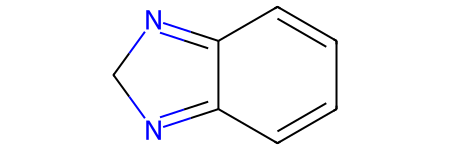

In [10]:
block_list = [
'C1N=C2C=CC=CC2=N1',
'N1N=C2C=CC=CC2=N1',
'O1N=C2C=CC=CC2=N1',
'[SiH2]1N=C2C=CC=CC2=N1',
'P1N=C2C=CC=CC2=N1',
'S1N=C2C=CC=CC2=N1',
'[Se]1N=C2C=CC=CC2=N1'
]
Chem.MolFromSmiles(block_list[0]) 

In [11]:
block_cs = [Chem.CanonSmiles(block) for block in block_list]
block_cs

['c1ccc2c(c1)=NCN=2',
 'c1ccc2n[nH]nc2c1',
 'c1ccc2nonc2c1',
 'c1ccc2c(c1)=N[SiH2]N=2',
 'c1ccc2n[pH]nc2c1',
 'c1ccc2nsnc2c1',
 'c1ccc2n[se]nc2c1']

In [12]:
for i in range(df.shape[0]):
    smiles_string = df.loc[i]['newSMILES']
    molecule = Chem.MolFromSmiles(smiles_string)
    fragment0 = Chem.MolFromSmiles(block_cs[0])
    fragment1 = Chem.MolFromSmiles(block_cs[1])
    fragment2 = Chem.MolFromSmiles(block_cs[2])
    fragment3 = Chem.MolFromSmiles(block_cs[3])
    fragment4 = Chem.MolFromSmiles(block_cs[4])
    fragment5 = Chem.MolFromSmiles(block_cs[5])
    fragment6 = Chem.MolFromSmiles(block_cs[6])
    frag_juge0 = molecule.HasSubstructMatch(fragment0)
    frag_juge1 = molecule.HasSubstructMatch(fragment1)
    frag_juge2 = molecule.HasSubstructMatch(fragment2)
    frag_juge3 = molecule.HasSubstructMatch(fragment3)
    frag_juge4 = molecule.HasSubstructMatch(fragment4)
    frag_juge5 = molecule.HasSubstructMatch(fragment5)
    frag_juge6 = molecule.HasSubstructMatch(fragment6)

    if frag_juge0 or frag_juge1 or frag_juge2 or frag_juge3 or frag_juge4 or frag_juge5 or frag_juge6:
        df.iloc[i,-1]=1
df

,Nickname,bandgap(eV),c_smiles,newSMILES,Ref.No,bt
0,P3HT,1.93,CCCCCCc1cc(C)sc1C,Cc1cc(C)c(s1)-c1cc(C)c(s1)-c1cc(C)c(s1)-c1cc(C...,S10,0
1,P3HST,1.82,CCCCCCSc1cc(C)sc1C,CSc1cc(sc1C)-c1sc(cc1SC)-c1sc(cc1SC)-c1sc(cc1S...,S123,0
2,POPT,1.76,CCCCCCCCc1ccc(-c2cc(C)sc2C)cc1,Cc1cc(c(s1)-c1cc(c(s1)-c1cc(c(s1)-c1cc(c(s1)-c...,S126,0
3,PT-C1,1.92,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(C)s1,COC(=O)c1cc(C)sc1-c1ccc(s1)-c1cc(C(=O)OC)c(s1)...,S122,0
4,PT-C2,1.89,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(-c2ccc(C)s2)s1,COC(=O)c1cc(C)sc1-c1ccc(s1)-c1ccc(s1)-c1cc(C(=...,S122,0
...,...,...,...,...,...,...
1091,BTT-NTz,1.68,CCCCCCCCCCCCc1cc(C)sc1-c1cc2c3sc(C(CCCCCCCC)CC...,Cc1cc(C)c(s1)-c1cc2c3sc(C)cc3c3cc(sc3c2s1)-c1s...,S115,1
1092,PIDTI-BT,1.65,CCCCCCCCCCCCC(CCCCCCCCCC)Cn1c2cc3c(cc2c2sc(C)c...,Cc1cc2n(C)c3cc4-c5cc6c(cc5C(c4cc3c2s1)(c1ccccc...,S441,1
1093,PIDTI-DTBT,1.66,CCCCCCCCCCCCC(CCCCCCCCCC)Cn1c2cc3c(cc2c2sc(C)c...,Cc1ccc(s1)-c1ccc(-c2ccc(s2)-c2cc3n(C)c4cc5-c6c...,S441,1
1094,poly(DPP4T-alt-TBP),1.52,CCCCCCCCCCCCC(CCCCCCCCCC)CN1C(=O)C2=C(c3ccc(-c...,CN1C(=O)C2=C(N(C)C(=O)C2=C1c1ccc(C)s1)c1ccc(s1...,S464,0


In [13]:
df[df['bt']==1]

,Nickname,bandgap(eV),c_smiles,newSMILES,Ref.No,bt
8,PDTPBT-C5,1.43,CCCCCC(CCCCC)n1c2cc(C)sc2c2sc(-c3ccc(C)c4nsnc3...,Cc1cc2n(C)c3cc(sc3c2s1)-c1ccc(-c2cc3n(C)c4cc(s...,S359,1
11,PDTPBT-C6,1.42,CCCCCCC(CCCCCC)n1c2cc(C)sc2c2sc(-c3ccc(C)c4nsn...,Cc1cc2n(C)c3cc(sc3c2s1)-c1ccc(-c2cc3n(C)c4cc(s...,S359,1
14,P1-0,1.73,CCCCCCCCC(CCCCCC)COc1c(F)c(-c2ccc(C)s2)c2nsnc2c1C,COc1c(C)c2nsnc2c(-c2ccc(s2)-c2c(OC)c(F)c(-c3cc...,S405,1
23,PGe1-C8,1.33,CCCCCCCC[Ge]1(CCCCCCCC)c2cc(C)sc2-c2sc(-c3ccc(...,Cc1cc2c(s1)-c1sc(cc1[Ge]2(C)C)-c1ccc(-c2cc3c(s...,S311,1
24,PSBTBT,1.45,CCCCC(CC)C[Si]1(CC(CC)CCCC)c2cc(C)sc2-c2sc(-c3...,Cc1cc2c(s1)-c1sc(cc1[Si]2(C)C)-c1ccc(-c2cc3c(s...,S6,1
...,...,...,...,...,...,...
1075,PTPTPTBT,1.73,CCCCCCCCOc1ccc(C2(c3ccc(OCCCCCCCC)cc3)c3cc4c(c...,Cc1cc2c(s1)-c1cc3c(cc1C2(c1ccccc1)c1ccccc1)-c1...,S343,1
1085,P1,1.16,CCCCCCCCCCCCCCCCC(CC)c1nc2c3nc4c(-c5cc(CCCCCCC...,COc1c2cc(C)sc2c(OC)c2cc(sc12)-c1sc(cc1C)-c1c2n...,S476,1
1091,BTT-NTz,1.68,CCCCCCCCCCCCc1cc(C)sc1-c1cc2c3sc(C(CCCCCCCC)CC...,Cc1cc(C)c(s1)-c1cc2c3sc(C)cc3c3cc(sc3c2s1)-c1s...,S115,1
1092,PIDTI-BT,1.65,CCCCCCCCCCCCC(CCCCCCCCCC)Cn1c2cc3c(cc2c2sc(C)c...,Cc1cc2n(C)c3cc4-c5cc6c(cc5C(c4cc3c2s1)(c1ccccc...,S441,1


## distribution analysis

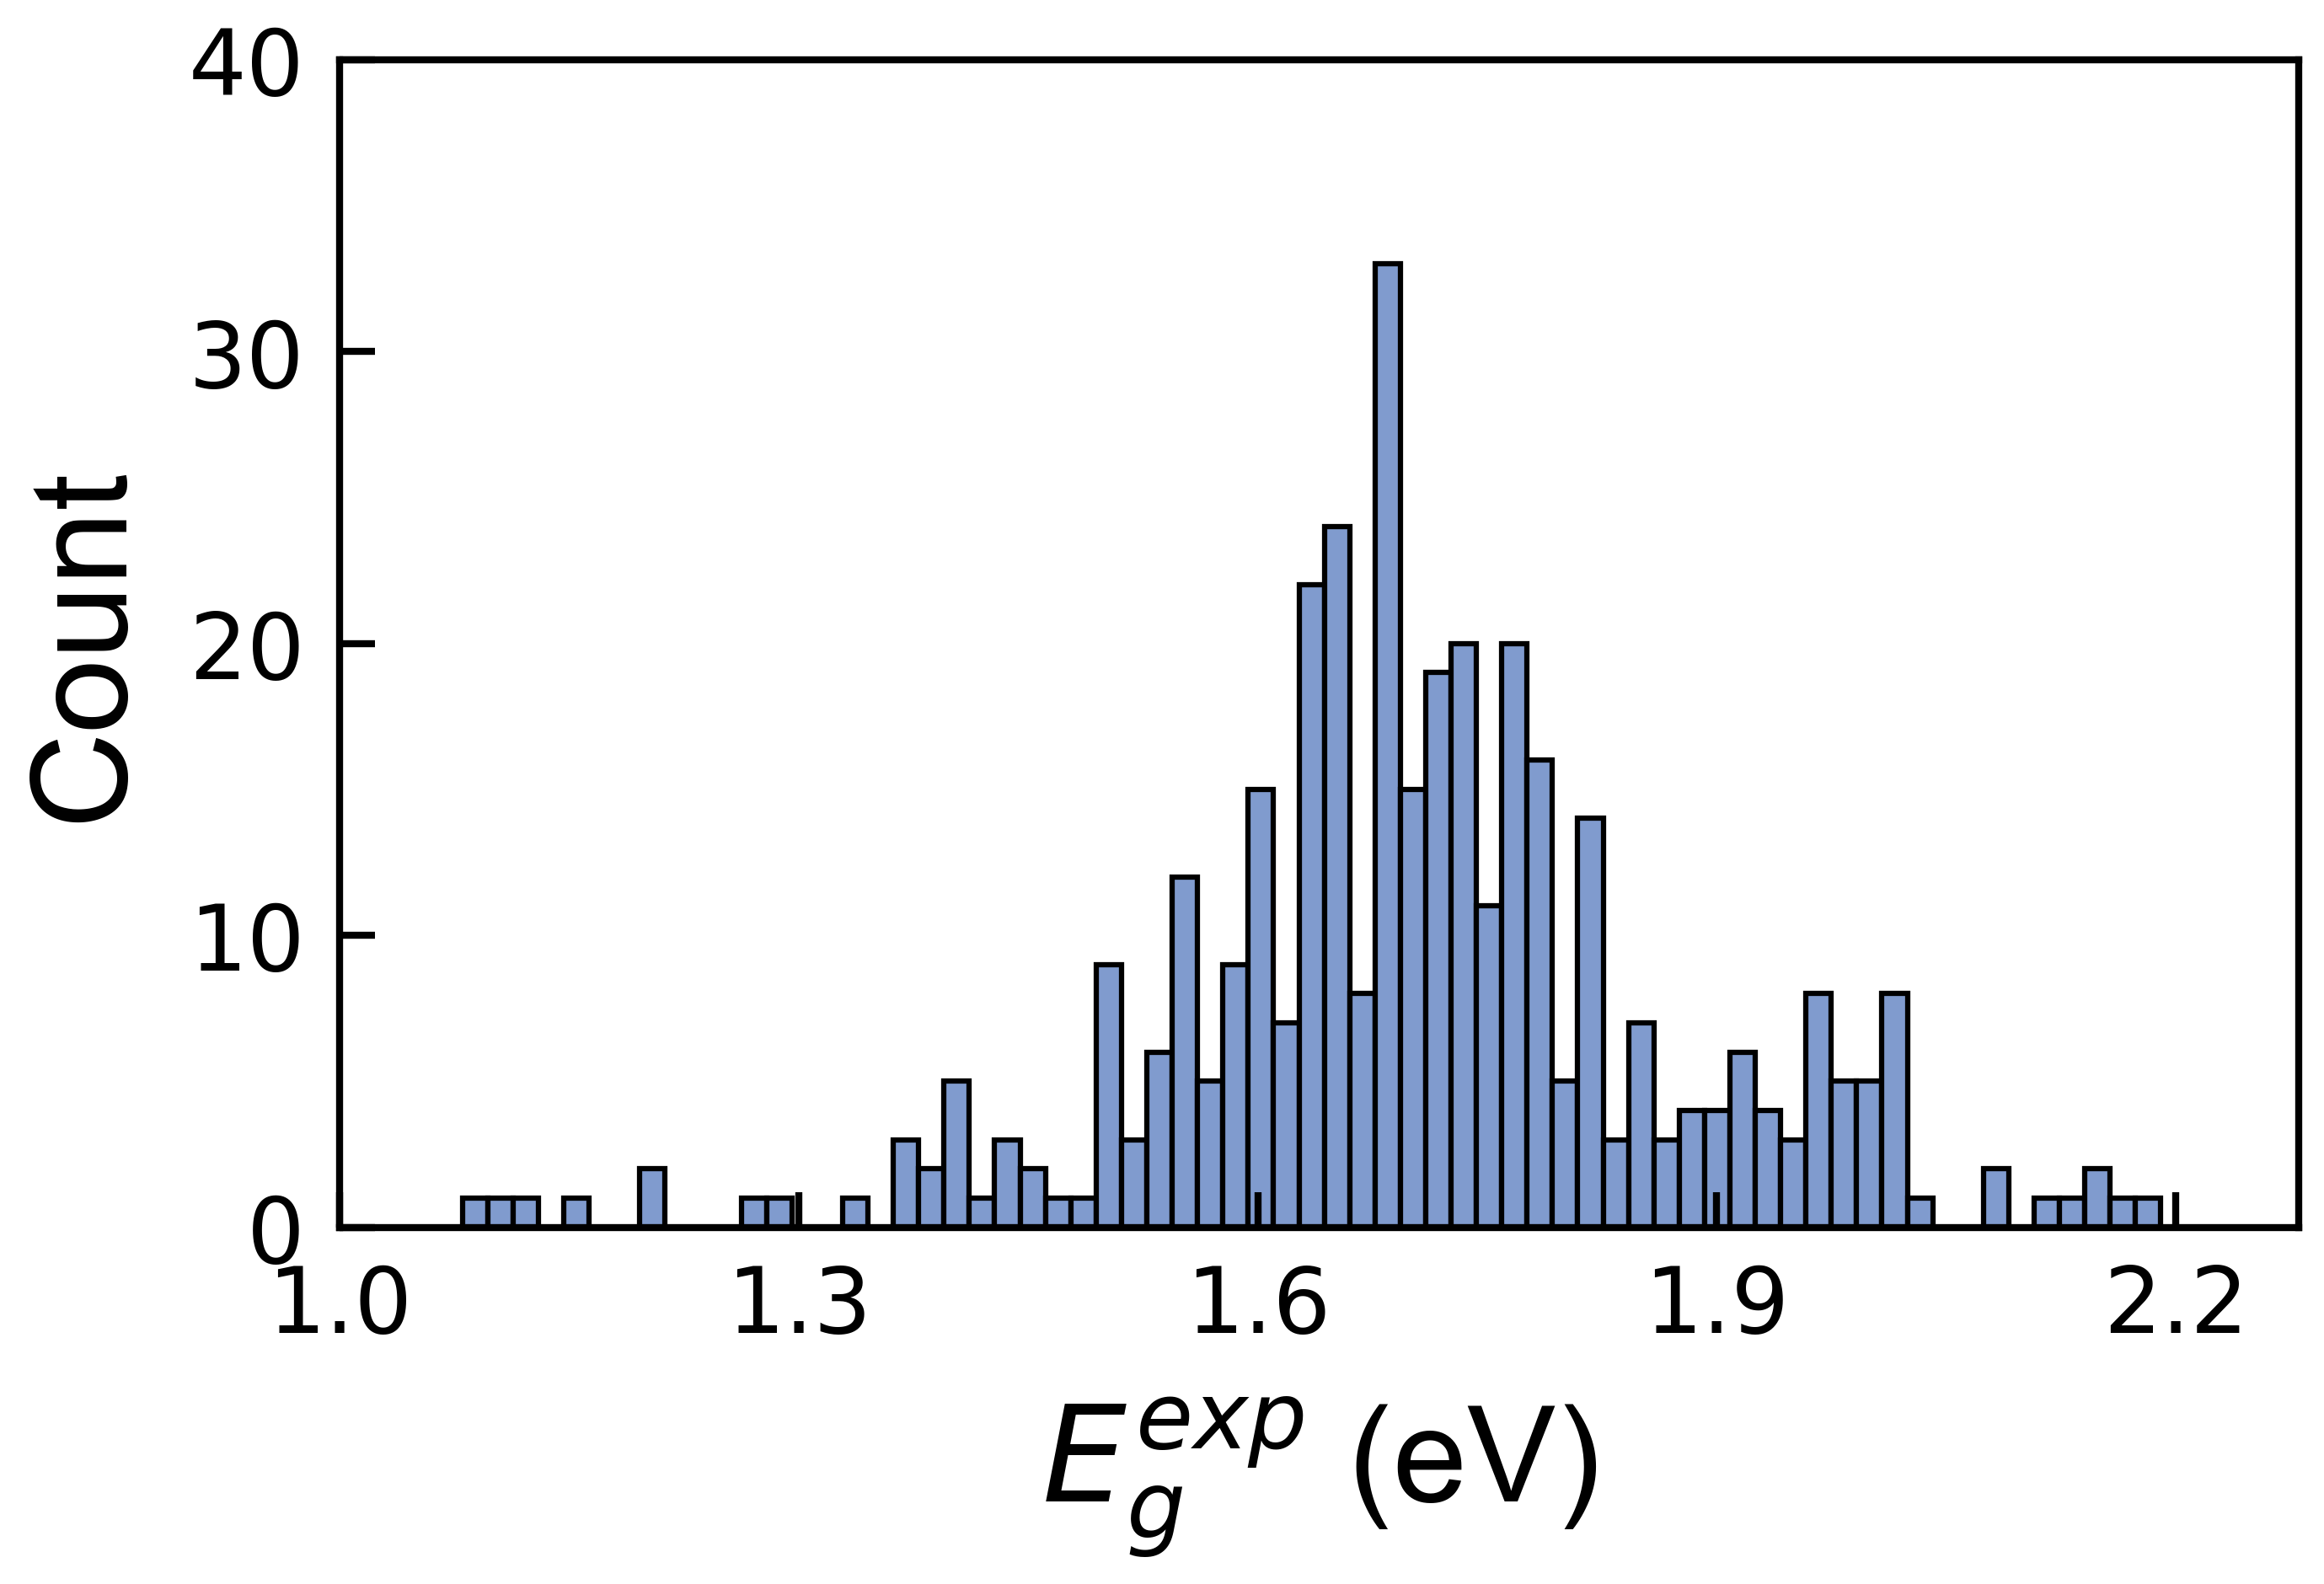

In [14]:
xticks=[1, 1.3, 1.6, 1.9, 2.2]
yticks = [0, 10, 20, 30, 40]
yscale =[0, 40]
xlabel='$E_{g}^{exp}$ (eV)'
hist_plot(df[df['bt']==1], 'bandgap(eV)', xticks, yticks, xlabel, yscale)

### svg plot

In [15]:
# foldername = 'bdt-svg'
# svg_plot(foldername, df_contains)

## 2. DPP: diketopyrrolo[3,4-c]-pyrrole-1,4-dione

In [16]:
df['dpp'] = 0
df

,Nickname,bandgap(eV),c_smiles,newSMILES,Ref.No,bt,dpp
0,P3HT,1.93,CCCCCCc1cc(C)sc1C,Cc1cc(C)c(s1)-c1cc(C)c(s1)-c1cc(C)c(s1)-c1cc(C...,S10,0,0
1,P3HST,1.82,CCCCCCSc1cc(C)sc1C,CSc1cc(sc1C)-c1sc(cc1SC)-c1sc(cc1SC)-c1sc(cc1S...,S123,0,0
2,POPT,1.76,CCCCCCCCc1ccc(-c2cc(C)sc2C)cc1,Cc1cc(c(s1)-c1cc(c(s1)-c1cc(c(s1)-c1cc(c(s1)-c...,S126,0,0
3,PT-C1,1.92,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(C)s1,COC(=O)c1cc(C)sc1-c1ccc(s1)-c1cc(C(=O)OC)c(s1)...,S122,0,0
4,PT-C2,1.89,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(-c2ccc(C)s2)s1,COC(=O)c1cc(C)sc1-c1ccc(s1)-c1ccc(s1)-c1cc(C(=...,S122,0,0
...,...,...,...,...,...,...,...
1091,BTT-NTz,1.68,CCCCCCCCCCCCc1cc(C)sc1-c1cc2c3sc(C(CCCCCCCC)CC...,Cc1cc(C)c(s1)-c1cc2c3sc(C)cc3c3cc(sc3c2s1)-c1s...,S115,1,0
1092,PIDTI-BT,1.65,CCCCCCCCCCCCC(CCCCCCCCCC)Cn1c2cc3c(cc2c2sc(C)c...,Cc1cc2n(C)c3cc4-c5cc6c(cc5C(c4cc3c2s1)(c1ccccc...,S441,1,0
1093,PIDTI-DTBT,1.66,CCCCCCCCCCCCC(CCCCCCCCCC)Cn1c2cc3c(cc2c2sc(C)c...,Cc1ccc(s1)-c1ccc(-c2ccc(s2)-c2cc3n(C)c4cc5-c6c...,S441,1,0
1094,poly(DPP4T-alt-TBP),1.52,CCCCCCCCCCCCC(CCCCCCCCCC)CN1C(=O)C2=C(c3ccc(-c...,CN1C(=O)C2=C(N(C)C(=O)C2=C1c1ccc(C)s1)c1ccc(s1...,S464,0,0


In [17]:
block_list = [
'O=C1NC=C2C(=O)NC=C12'
]
Chem.MolFromSmiles(block_list[0]) 

block_cs = [Chem.CanonSmiles(block) for block in block_list]
block_cs

['O=C1NC=C2C(=O)NC=C12']

In [18]:
for i in range(df.shape[0]):
    smiles_string = df.loc[i]['newSMILES']
    molecule = Chem.MolFromSmiles(smiles_string)
    fragment0 = Chem.MolFromSmiles(block_cs[0])

    frag_juge0 = molecule.HasSubstructMatch(fragment0)


    if frag_juge0 :
        df.iloc[i,-1]=1
df

,Nickname,bandgap(eV),c_smiles,newSMILES,Ref.No,bt,dpp
0,P3HT,1.93,CCCCCCc1cc(C)sc1C,Cc1cc(C)c(s1)-c1cc(C)c(s1)-c1cc(C)c(s1)-c1cc(C...,S10,0,0
1,P3HST,1.82,CCCCCCSc1cc(C)sc1C,CSc1cc(sc1C)-c1sc(cc1SC)-c1sc(cc1SC)-c1sc(cc1S...,S123,0,0
2,POPT,1.76,CCCCCCCCc1ccc(-c2cc(C)sc2C)cc1,Cc1cc(c(s1)-c1cc(c(s1)-c1cc(c(s1)-c1cc(c(s1)-c...,S126,0,0
3,PT-C1,1.92,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(C)s1,COC(=O)c1cc(C)sc1-c1ccc(s1)-c1cc(C(=O)OC)c(s1)...,S122,0,0
4,PT-C2,1.89,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(-c2ccc(C)s2)s1,COC(=O)c1cc(C)sc1-c1ccc(s1)-c1ccc(s1)-c1cc(C(=...,S122,0,0
...,...,...,...,...,...,...,...
1091,BTT-NTz,1.68,CCCCCCCCCCCCc1cc(C)sc1-c1cc2c3sc(C(CCCCCCCC)CC...,Cc1cc(C)c(s1)-c1cc2c3sc(C)cc3c3cc(sc3c2s1)-c1s...,S115,1,0
1092,PIDTI-BT,1.65,CCCCCCCCCCCCC(CCCCCCCCCC)Cn1c2cc3c(cc2c2sc(C)c...,Cc1cc2n(C)c3cc4-c5cc6c(cc5C(c4cc3c2s1)(c1ccccc...,S441,1,0
1093,PIDTI-DTBT,1.66,CCCCCCCCCCCCC(CCCCCCCCCC)Cn1c2cc3c(cc2c2sc(C)c...,Cc1ccc(s1)-c1ccc(-c2ccc(s2)-c2cc3n(C)c4cc5-c6c...,S441,1,0
1094,poly(DPP4T-alt-TBP),1.52,CCCCCCCCCCCCC(CCCCCCCCCC)CN1C(=O)C2=C(c3ccc(-c...,CN1C(=O)C2=C(N(C)C(=O)C2=C1c1ccc(C)s1)c1ccc(s1...,S464,0,1


In [19]:
df[df['dpp']==1]

,Nickname,bandgap(eV),c_smiles,newSMILES,Ref.No,bt,dpp
165,PDPP2FT-C12,1.40,CCCCCCCCCCCCN1C(=O)C2=C(c3ccc(-c4ccc(C)s4)o3)N...,CN1C(=O)C2=C(N(C)C(=O)C2=C1c1ccc(C)o1)c1ccc(o1...,S89,0,1
225,PDTP-DTDPP(Bu),1.13,CCCCC(CC)CC(C[C@H](CC)CCCC)n1c2cc(C)sc2c2sc(-c...,CN1C(=O)C2=C(N(C)C(=O)C2=C1c1ccc(C)s1)c1ccc(s1...,S27,0,1
231,TDPP-BBT,1.43,CCCCCCOc1c2cc(-c3ccc(C4=C5C(=O)N(CCCCCC)C(c6cc...,COc1c2cc(C)sc2c(OC)c2cc(sc12)-c1ccc(s1)C1=C2C(...,S85,0,1
238,PDPP2FT-C14,1.40,CCCCCCCCCCCCCCN1C(=O)C2=C(c3ccc(-c4ccc(C)s4)o3...,CN1C(=O)C2=C(N(C)C(=O)C2=C1c1ccc(C)o1)c1ccc(o1...,S89,0,1
246,PGFDTDPP (C4),1.63,CCCCCCCCN1C(=O)C2=C(c3ccc(-c4ccc5c(c4)-c4ccc(C...,CN1C(=O)C2=C(N(C)C(=O)C2=C1c1ccc(C)s1)c1ccc(s1...,S25,0,1
...,...,...,...,...,...,...,...
1069,PHBCDPPF,1.73,CCCCCCCCCCC(CCCCCCCC)CN1C(=O)C2=C(c3ccc(-c4cc5...,CN1C(=O)C2=C(N(C)C(=O)C2=C1c1ccc(C)o1)c1ccc(o1...,S470,0,1
1070,PHBCDPPC20,1.70,CCCCCCCCCCC(CCCCCCCC)CN1C(=O)C2=C(c3ccc(-c4cc5...,CN1C(=O)C2=C(N(C)C(=O)C2=C1c1ccc(C)s1)c1ccc(s1...,S470,0,1
1077,PHBCDPPDT,1.64,CCCCCCCCCCC(CCCCCCCC)CN1C(=O)C2=C(c3ccc(-c4ccc...,CN1C(=O)C2=C(N(C)C(=O)C2=C1c1ccc(s1)-c1ccc(C)s...,S470,0,1
1078,PCDPP,1.55,CCCCCCCCC(CCCCCC)CN1C(=O)C2=C(c3ccc(-c4cc(F)c(...,CN1C(=O)C2=C(N(C)C(=O)C2=C1c1ccc(C)s1)c1ccc(s1...,S432,0,1


### distribution plot

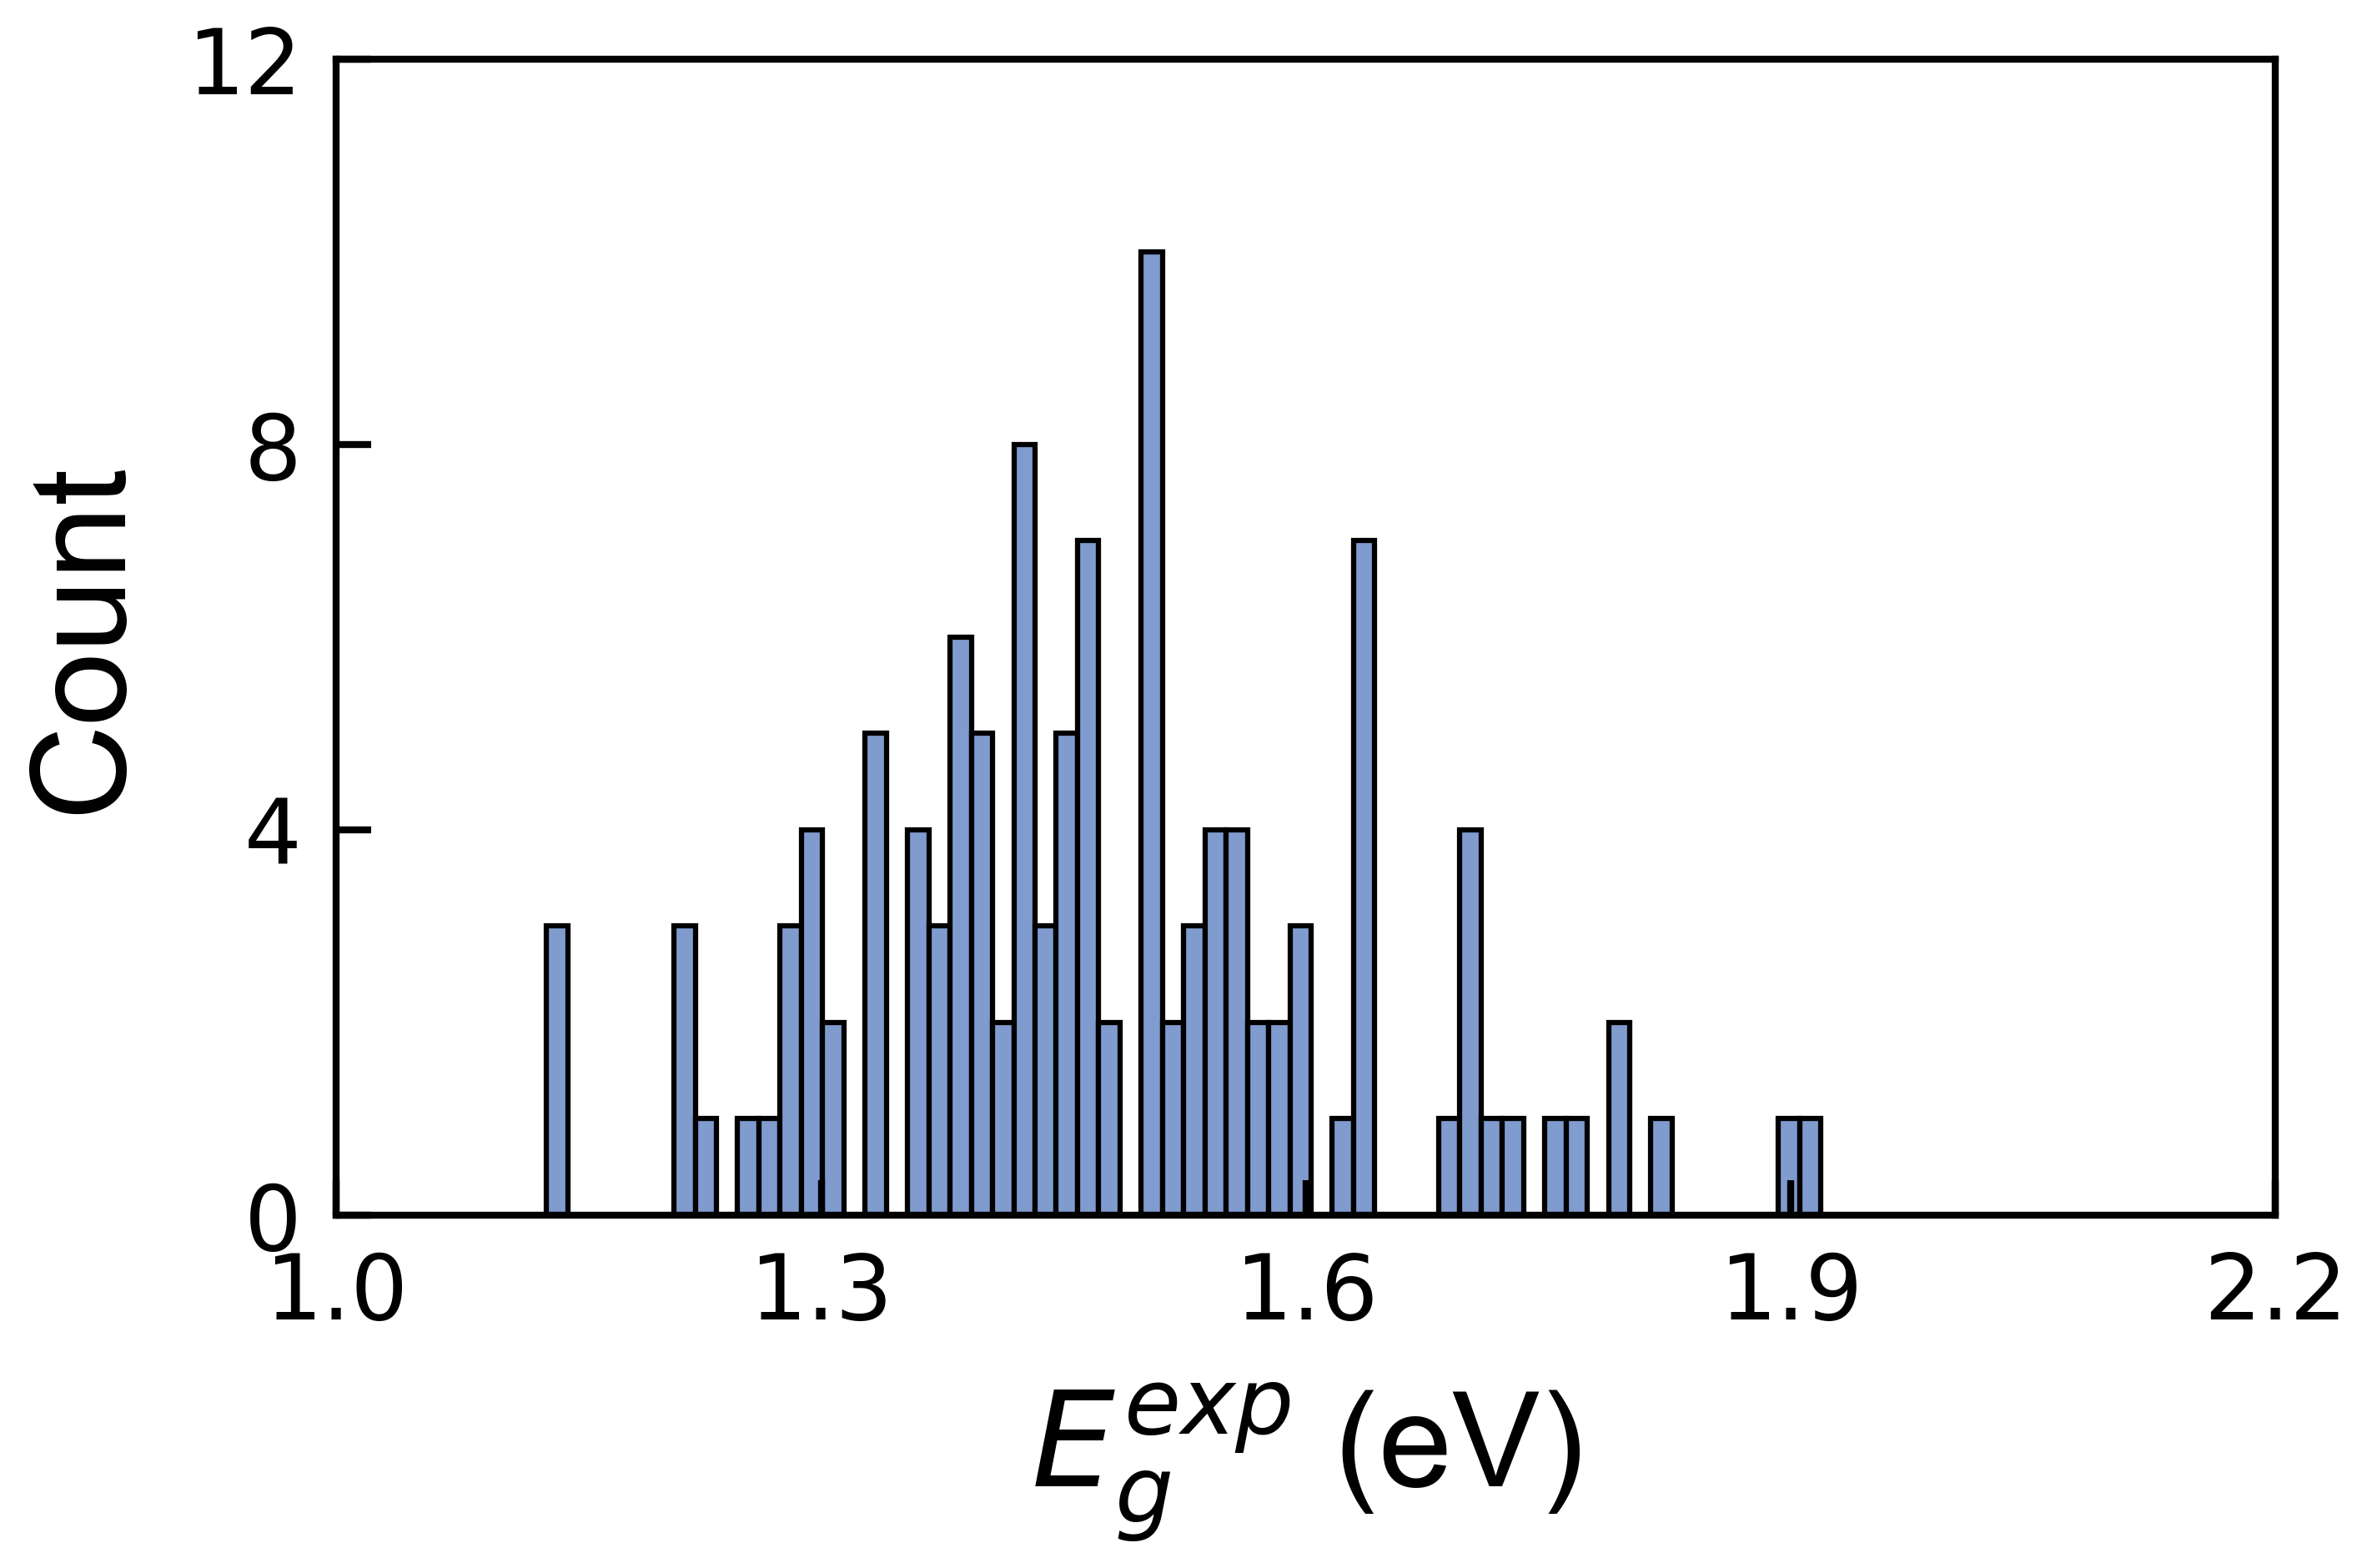

In [20]:
xticks=[1, 1.3, 1.6, 1.9, 2.2]
yticks = [0, 4,8,12]
yscale =[0, 12]
xlabel='$E_{g}^{exp}$ (eV)'
hist_plot(df[df['dpp']==1], 'bandgap(eV)', xticks, yticks, xlabel, yscale)

## 3. QA: quinoxaline

In [21]:
df['qa']=0
df

,Nickname,bandgap(eV),c_smiles,newSMILES,Ref.No,bt,dpp,qa
0,P3HT,1.93,CCCCCCc1cc(C)sc1C,Cc1cc(C)c(s1)-c1cc(C)c(s1)-c1cc(C)c(s1)-c1cc(C...,S10,0,0,0
1,P3HST,1.82,CCCCCCSc1cc(C)sc1C,CSc1cc(sc1C)-c1sc(cc1SC)-c1sc(cc1SC)-c1sc(cc1S...,S123,0,0,0
2,POPT,1.76,CCCCCCCCc1ccc(-c2cc(C)sc2C)cc1,Cc1cc(c(s1)-c1cc(c(s1)-c1cc(c(s1)-c1cc(c(s1)-c...,S126,0,0,0
3,PT-C1,1.92,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(C)s1,COC(=O)c1cc(C)sc1-c1ccc(s1)-c1cc(C(=O)OC)c(s1)...,S122,0,0,0
4,PT-C2,1.89,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(-c2ccc(C)s2)s1,COC(=O)c1cc(C)sc1-c1ccc(s1)-c1ccc(s1)-c1cc(C(=...,S122,0,0,0
...,...,...,...,...,...,...,...,...
1091,BTT-NTz,1.68,CCCCCCCCCCCCc1cc(C)sc1-c1cc2c3sc(C(CCCCCCCC)CC...,Cc1cc(C)c(s1)-c1cc2c3sc(C)cc3c3cc(sc3c2s1)-c1s...,S115,1,0,0
1092,PIDTI-BT,1.65,CCCCCCCCCCCCC(CCCCCCCCCC)Cn1c2cc3c(cc2c2sc(C)c...,Cc1cc2n(C)c3cc4-c5cc6c(cc5C(c4cc3c2s1)(c1ccccc...,S441,1,0,0
1093,PIDTI-DTBT,1.66,CCCCCCCCCCCCC(CCCCCCCCCC)Cn1c2cc3c(cc2c2sc(C)c...,Cc1ccc(s1)-c1ccc(-c2ccc(s2)-c2cc3n(C)c4cc5-c6c...,S441,1,0,0
1094,poly(DPP4T-alt-TBP),1.52,CCCCCCCCCCCCC(CCCCCCCCCC)CN1C(=O)C2=C(c3ccc(-c...,CN1C(=O)C2=C(N(C)C(=O)C2=C1c1ccc(C)s1)c1ccc(s1...,S464,0,1,0


In [22]:
block_list = [
'C1=CC2=C(C=C1)N=CC=N2'
]
Chem.MolFromSmiles(block_list[0]) 

block_cs = [Chem.CanonSmiles(block) for block in block_list]
block_cs

['c1ccc2nccnc2c1']

In [23]:
for i in range(df.shape[0]):
    smiles_string = df.loc[i]['newSMILES']
    molecule = Chem.MolFromSmiles(smiles_string)
    fragment0 = Chem.MolFromSmiles(block_cs[0])

    frag_juge0 = molecule.HasSubstructMatch(fragment0)


    if frag_juge0 :
        df.iloc[i,-1]=1
df

,Nickname,bandgap(eV),c_smiles,newSMILES,Ref.No,bt,dpp,qa
0,P3HT,1.93,CCCCCCc1cc(C)sc1C,Cc1cc(C)c(s1)-c1cc(C)c(s1)-c1cc(C)c(s1)-c1cc(C...,S10,0,0,0
1,P3HST,1.82,CCCCCCSc1cc(C)sc1C,CSc1cc(sc1C)-c1sc(cc1SC)-c1sc(cc1SC)-c1sc(cc1S...,S123,0,0,0
2,POPT,1.76,CCCCCCCCc1ccc(-c2cc(C)sc2C)cc1,Cc1cc(c(s1)-c1cc(c(s1)-c1cc(c(s1)-c1cc(c(s1)-c...,S126,0,0,0
3,PT-C1,1.92,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(C)s1,COC(=O)c1cc(C)sc1-c1ccc(s1)-c1cc(C(=O)OC)c(s1)...,S122,0,0,0
4,PT-C2,1.89,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(-c2ccc(C)s2)s1,COC(=O)c1cc(C)sc1-c1ccc(s1)-c1ccc(s1)-c1cc(C(=...,S122,0,0,0
...,...,...,...,...,...,...,...,...
1091,BTT-NTz,1.68,CCCCCCCCCCCCc1cc(C)sc1-c1cc2c3sc(C(CCCCCCCC)CC...,Cc1cc(C)c(s1)-c1cc2c3sc(C)cc3c3cc(sc3c2s1)-c1s...,S115,1,0,0
1092,PIDTI-BT,1.65,CCCCCCCCCCCCC(CCCCCCCCCC)Cn1c2cc3c(cc2c2sc(C)c...,Cc1cc2n(C)c3cc4-c5cc6c(cc5C(c4cc3c2s1)(c1ccccc...,S441,1,0,0
1093,PIDTI-DTBT,1.66,CCCCCCCCCCCCC(CCCCCCCCCC)Cn1c2cc3c(cc2c2sc(C)c...,Cc1ccc(s1)-c1ccc(-c2ccc(s2)-c2cc3n(C)c4cc5-c6c...,S441,1,0,0
1094,poly(DPP4T-alt-TBP),1.52,CCCCCCCCCCCCC(CCCCCCCCCC)CN1C(=O)C2=C(c3ccc(-c...,CN1C(=O)C2=C(N(C)C(=O)C2=C1c1ccc(C)s1)c1ccc(s1...,S464,0,1,0


In [24]:
df[df['qa']==1]

,Nickname,bandgap(eV),c_smiles,newSMILES,Ref.No,bt,dpp,qa
52,P(PTQD-Th),1.84,CCCCCCCCCCC(CCCCCCCC)CN1C(=O)c2nc3c(nc2C1=O)c1...,CN1C(=O)c2nc3c4sc(C)cc4c4cc(sc4c3nc2C1=O)-c1cc...,S135,0,0,1
54,TQ1,1.70,CCCCCCCCOc1cccc(-c2nc3c(C)ccc(-c4ccc(C)s4)c3nc...,COc1cccc(c1)-c1nc2c(C)ccc(-c3ccc(s3)-c3ccc(-c4...,S352,0,0,1
55,P(T-QX),1.65,CCCCCCCCOc1ccc(-c2nc3c(C)ccc(-c4ccc(C)s4)c3nc2...,COc1ccc(cc1)-c1nc2c(C)ccc(-c3ccc(s3)-c3ccc(-c4...,S241,0,0,1
56,TQF2-1,1.80,CCCCCCCCOc1cccc(-c2nc3c(C)c(F)c(F)c(-c4ccc(C)s...,COc1cccc(c1)-c1nc2c(C)c(F)c(F)c(-c3ccc(s3)-c3c...,S495,0,0,1
86,P(PTQD-2Th),1.70,CCCCCCCCCCC(CCCCCCCC)CN1C(=O)c2nc3c(nc2C1=O)c1...,CN1C(=O)c2nc3c4sc(C)cc4c4cc(sc4c3nc2C1=O)-c1cc...,S135,0,0,1
...,...,...,...,...,...,...,...,...
1074,P2,1.08,CCCCCCCCCCCCCCCCC(CC)c1nc2c3nc4c(-c5cc(CCCCCCC...,Cc1cc2c(s1)-c1sc(cc1[Si]2(C)C)-c1sc(cc1C)-c1c2...,S476,1,0,1
1085,P1,1.16,CCCCCCCCCCCCCCCCC(CC)c1nc2c3nc4c(-c5cc(CCCCCCC...,COc1c2cc(C)sc2c(OC)c2cc(sc12)-c1sc(cc1C)-c1c2n...,S476,1,0,1
1086,PTPTPTQX,1.80,CCCCCCCCOc1ccc(C2(c3ccc(OCCCCCCCC)cc3)c3cc4c(c...,Cc1cc2c(s1)-c1cc3c(cc1C2(c1ccccc1)c1ccccc1)-c1...,S343,0,0,1
1087,PIDT-DTQ,1.63,CCCCCCCCOc1cccc(-c2nc3c(C)ccc(-c4ccc(-c5ccc(-c...,Cc1ccc(s1)-c1cc2c(s1)-c1cc3c(cc1C2(c1ccccc1)c1...,S465,0,0,1


### distribution plot

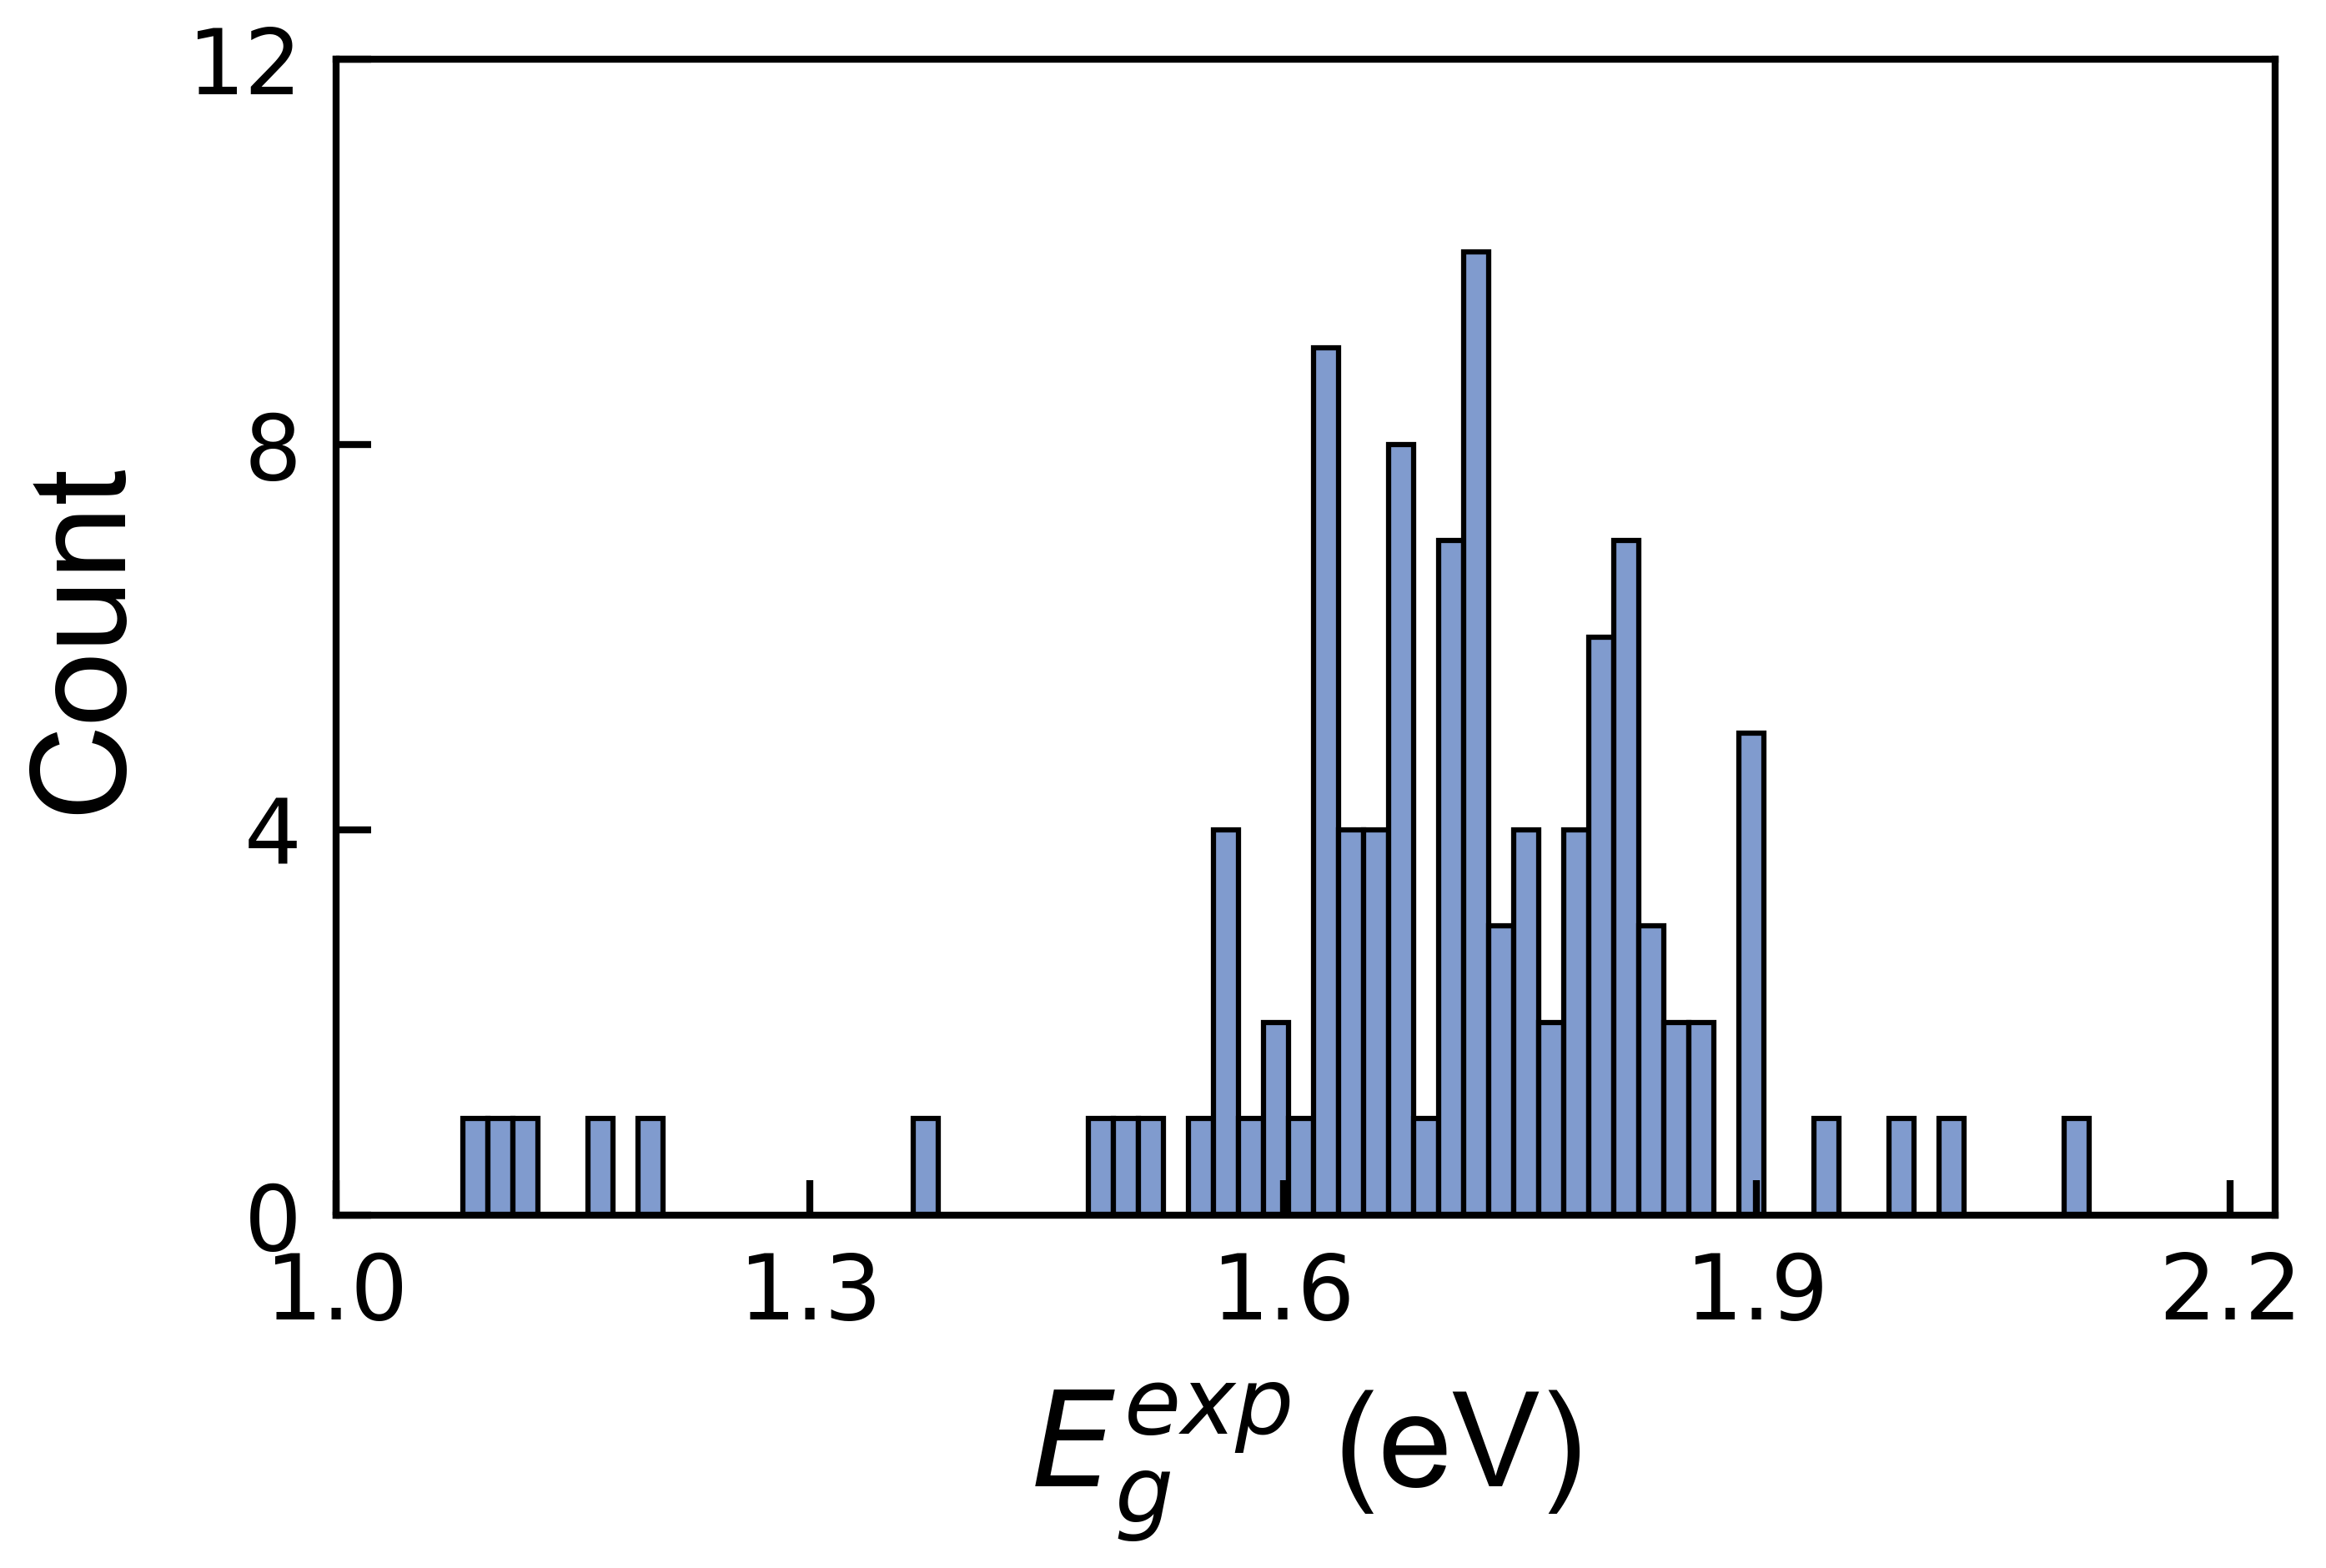

In [25]:
xticks=[1, 1.3, 1.6, 1.9, 2.2]
yticks = [0, 4,8, 12]
yscale =[0, 12]
xlabel='$E_{g}^{exp}$ (eV)'
hist_plot(df[df['qa']==1], 'bandgap(eV)', xticks, yticks, xlabel, yscale)

## 4. TPD: thieno[3,4-c]pyrrole-4,6-dione

In [26]:
df['tpd']=0
df

,Nickname,bandgap(eV),c_smiles,newSMILES,Ref.No,bt,dpp,qa,tpd
0,P3HT,1.93,CCCCCCc1cc(C)sc1C,Cc1cc(C)c(s1)-c1cc(C)c(s1)-c1cc(C)c(s1)-c1cc(C...,S10,0,0,0,0
1,P3HST,1.82,CCCCCCSc1cc(C)sc1C,CSc1cc(sc1C)-c1sc(cc1SC)-c1sc(cc1SC)-c1sc(cc1S...,S123,0,0,0,0
2,POPT,1.76,CCCCCCCCc1ccc(-c2cc(C)sc2C)cc1,Cc1cc(c(s1)-c1cc(c(s1)-c1cc(c(s1)-c1cc(c(s1)-c...,S126,0,0,0,0
3,PT-C1,1.92,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(C)s1,COC(=O)c1cc(C)sc1-c1ccc(s1)-c1cc(C(=O)OC)c(s1)...,S122,0,0,0,0
4,PT-C2,1.89,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(-c2ccc(C)s2)s1,COC(=O)c1cc(C)sc1-c1ccc(s1)-c1ccc(s1)-c1cc(C(=...,S122,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1091,BTT-NTz,1.68,CCCCCCCCCCCCc1cc(C)sc1-c1cc2c3sc(C(CCCCCCCC)CC...,Cc1cc(C)c(s1)-c1cc2c3sc(C)cc3c3cc(sc3c2s1)-c1s...,S115,1,0,0,0
1092,PIDTI-BT,1.65,CCCCCCCCCCCCC(CCCCCCCCCC)Cn1c2cc3c(cc2c2sc(C)c...,Cc1cc2n(C)c3cc4-c5cc6c(cc5C(c4cc3c2s1)(c1ccccc...,S441,1,0,0,0
1093,PIDTI-DTBT,1.66,CCCCCCCCCCCCC(CCCCCCCCCC)Cn1c2cc3c(cc2c2sc(C)c...,Cc1ccc(s1)-c1ccc(-c2ccc(s2)-c2cc3n(C)c4cc5-c6c...,S441,1,0,0,0
1094,poly(DPP4T-alt-TBP),1.52,CCCCCCCCCCCCC(CCCCCCCCCC)CN1C(=O)C2=C(c3ccc(-c...,CN1C(=O)C2=C(N(C)C(=O)C2=C1c1ccc(C)s1)c1ccc(s1...,S464,0,1,0,0


In [27]:
block_list = [
'O=C1NC(=O)C2=CSC=C12',
]
Chem.MolFromSmiles(block_list[0]) 

block_cs = [Chem.CanonSmiles(block) for block in block_list]
block_cs

['O=C1NC(=O)c2cscc21']

In [28]:
for i in range(df.shape[0]):
    smiles_string = df.loc[i]['newSMILES']
    molecule = Chem.MolFromSmiles(smiles_string)
    fragment0 = Chem.MolFromSmiles(block_cs[0])

    frag_juge0 = molecule.HasSubstructMatch(fragment0)


    if frag_juge0:
        df.iloc[i,-1]=1
df

,Nickname,bandgap(eV),c_smiles,newSMILES,Ref.No,bt,dpp,qa,tpd
0,P3HT,1.93,CCCCCCc1cc(C)sc1C,Cc1cc(C)c(s1)-c1cc(C)c(s1)-c1cc(C)c(s1)-c1cc(C...,S10,0,0,0,0
1,P3HST,1.82,CCCCCCSc1cc(C)sc1C,CSc1cc(sc1C)-c1sc(cc1SC)-c1sc(cc1SC)-c1sc(cc1S...,S123,0,0,0,0
2,POPT,1.76,CCCCCCCCc1ccc(-c2cc(C)sc2C)cc1,Cc1cc(c(s1)-c1cc(c(s1)-c1cc(c(s1)-c1cc(c(s1)-c...,S126,0,0,0,0
3,PT-C1,1.92,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(C)s1,COC(=O)c1cc(C)sc1-c1ccc(s1)-c1cc(C(=O)OC)c(s1)...,S122,0,0,0,0
4,PT-C2,1.89,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(-c2ccc(C)s2)s1,COC(=O)c1cc(C)sc1-c1ccc(s1)-c1ccc(s1)-c1cc(C(=...,S122,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1091,BTT-NTz,1.68,CCCCCCCCCCCCc1cc(C)sc1-c1cc2c3sc(C(CCCCCCCC)CC...,Cc1cc(C)c(s1)-c1cc2c3sc(C)cc3c3cc(sc3c2s1)-c1s...,S115,1,0,0,0
1092,PIDTI-BT,1.65,CCCCCCCCCCCCC(CCCCCCCCCC)Cn1c2cc3c(cc2c2sc(C)c...,Cc1cc2n(C)c3cc4-c5cc6c(cc5C(c4cc3c2s1)(c1ccccc...,S441,1,0,0,0
1093,PIDTI-DTBT,1.66,CCCCCCCCCCCCC(CCCCCCCCCC)Cn1c2cc3c(cc2c2sc(C)c...,Cc1ccc(s1)-c1ccc(-c2ccc(s2)-c2cc3n(C)c4cc5-c6c...,S441,1,0,0,0
1094,poly(DPP4T-alt-TBP),1.52,CCCCCCCCCCCCC(CCCCCCCCCC)CN1C(=O)C2=C(c3ccc(-c...,CN1C(=O)C2=C(N(C)C(=O)C2=C1c1ccc(C)s1)c1ccc(s1...,S464,0,1,0,0


In [29]:
df[df['tpd']==1]

,Nickname,bandgap(eV),c_smiles,newSMILES,Ref.No,bt,dpp,qa,tpd
30,PBTTPD,1.77,CCCCCCCCC(CCCCCCCC)N1C(=O)c2c(C)sc(-c3ccc(-c4c...,CN1C(=O)c2c(C)sc(-c3ccc(s3)-c3ccc(s3)-c3sc(-c4...,S301,0,0,0,1
39,PTVTPD,1.77,CCCCCCCCC(CCCCCCCC)N1C(=O)c2c(C)sc(-c3ccc(/C=C...,CN1C(=O)c2c(C)sc(-c3ccc(\C=C\c4ccc(s4)-c4sc(-c...,S301,0,0,0,1
71,TPO(CO)(2EH/C1),1.79,CCCCC(CC)Cc1ccc(-c2c3cc(-c4sc(C)c5c4C(=O)N(C(C...,CC(=O)N1C(=O)c2c(C)sc(-c3cc4c(-c5cccs5)c5sc(cc...,S226,0,0,0,1
87,P-Ge,1.69,CCCCCCCCN1C(=O)c2c(C)sc(-c3cc4c(s3)-c3sc(C)cc3...,CN1C(=O)c2c(C)sc(-c3cc4c(s3)-c3sc(cc3[Ge]4(C)C...,S310,0,0,0,1
88,PDTSTPD,1.69,CCCCCCCCN1C(=O)c2c(C)sc(-c3cc4c(s3)-c3sc(C)cc3...,CN1C(=O)c2c(C)sc(-c3cc4c(s3)-c3sc(cc3[Si]4(C)C...,S36,0,0,0,1
...,...,...,...,...,...,...,...,...,...
998,PzNDTT-TPD1,1.94,CCCCCCCCCCc1cc(C)sc1-c1sc(-c2sc(-c3cc4c(-c5ccc...,CN1C(=O)c2c(sc(-c3sc(cc3C)-c3cc4c(cc5c6sc(cc6c...,S180,0,0,0,1
1002,P4,1.22,CCCCCCCCCCC(CCCCCCCC)CN1C(=O)C2=C(c3ccc(-c4sc(...,CN1C(C)=C2C(=O)N(C)C(=C2C1=O)c1ccc(s1)-c1sc(cc...,S492,0,1,0,1
1010,PTAC-TPD (P1),1.90,CCCCCCCCCCCCC(CCCCCCCCCC)COc1nc2ccc3c4cc(-c5cc...,COc1nc2ccc3c4cc(sc4c4c(OC)nc5ccc6c7cc(C)sc7c1c...,S159,0,0,0,1
1030,LGC-D013,1.84,CCCCCCCCCCCCN1C(=O)c2c(C)sc(-c3ccc(-c4sc(-c5cc...,CN1C(=O)c2c(C)sc(-c3ccc(s3)-c3sc(c(C)c3C)-c3cc...,S494,0,0,0,1


### distribution plot

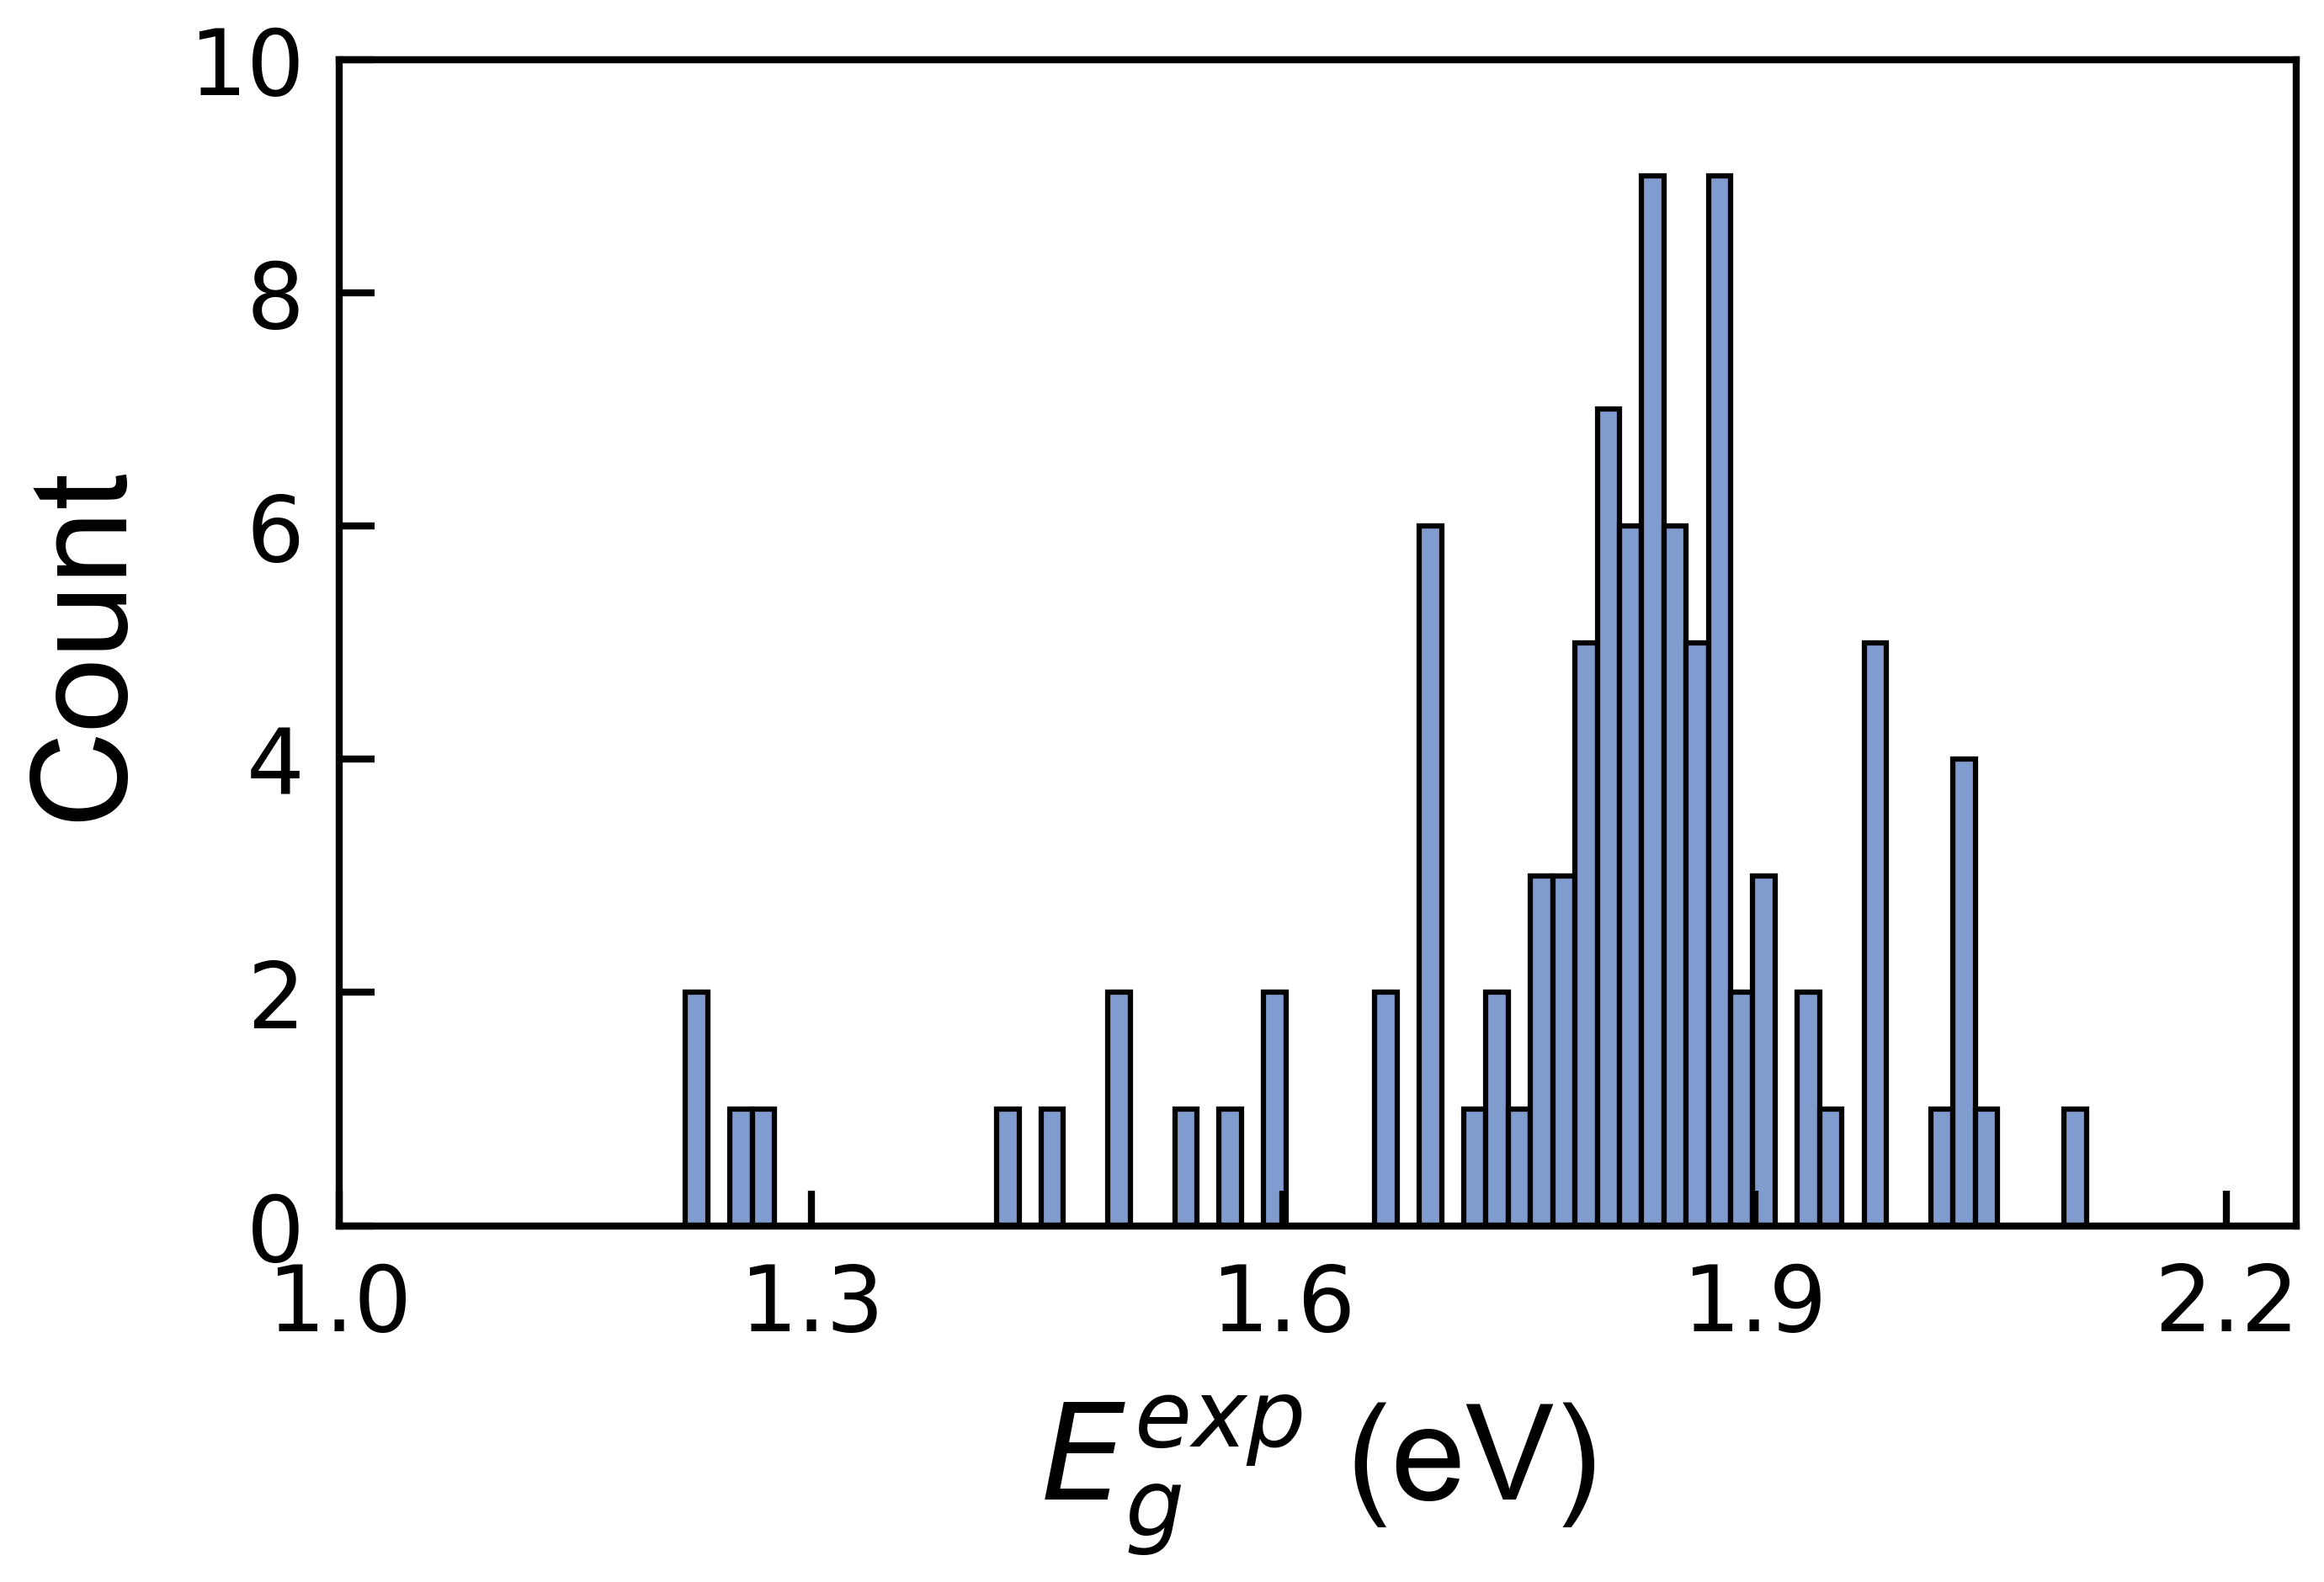

In [30]:
xticks=[1, 1.3, 1.6, 1.9, 2.2]
yticks = [0, 2,4,6,8, 10]
yscale =[0, 10]
xlabel='$E_{g}^{exp}$ (eV)'
hist_plot(df[df['tpd']==1], 'bandgap(eV)', xticks, yticks, xlabel, yscale)

## 5. others

In [31]:
df['others'] = 0
df

,Nickname,bandgap(eV),c_smiles,newSMILES,Ref.No,bt,dpp,qa,tpd,others
0,P3HT,1.93,CCCCCCc1cc(C)sc1C,Cc1cc(C)c(s1)-c1cc(C)c(s1)-c1cc(C)c(s1)-c1cc(C...,S10,0,0,0,0,0
1,P3HST,1.82,CCCCCCSc1cc(C)sc1C,CSc1cc(sc1C)-c1sc(cc1SC)-c1sc(cc1SC)-c1sc(cc1S...,S123,0,0,0,0,0
2,POPT,1.76,CCCCCCCCc1ccc(-c2cc(C)sc2C)cc1,Cc1cc(c(s1)-c1cc(c(s1)-c1cc(c(s1)-c1cc(c(s1)-c...,S126,0,0,0,0,0
3,PT-C1,1.92,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(C)s1,COC(=O)c1cc(C)sc1-c1ccc(s1)-c1cc(C(=O)OC)c(s1)...,S122,0,0,0,0,0
4,PT-C2,1.89,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(-c2ccc(C)s2)s1,COC(=O)c1cc(C)sc1-c1ccc(s1)-c1ccc(s1)-c1cc(C(=...,S122,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1091,BTT-NTz,1.68,CCCCCCCCCCCCc1cc(C)sc1-c1cc2c3sc(C(CCCCCCCC)CC...,Cc1cc(C)c(s1)-c1cc2c3sc(C)cc3c3cc(sc3c2s1)-c1s...,S115,1,0,0,0,0
1092,PIDTI-BT,1.65,CCCCCCCCCCCCC(CCCCCCCCCC)Cn1c2cc3c(cc2c2sc(C)c...,Cc1cc2n(C)c3cc4-c5cc6c(cc5C(c4cc3c2s1)(c1ccccc...,S441,1,0,0,0,0
1093,PIDTI-DTBT,1.66,CCCCCCCCCCCCC(CCCCCCCCCC)Cn1c2cc3c(cc2c2sc(C)c...,Cc1ccc(s1)-c1ccc(-c2ccc(s2)-c2cc3n(C)c4cc5-c6c...,S441,1,0,0,0,0
1094,poly(DPP4T-alt-TBP),1.52,CCCCCCCCCCCCC(CCCCCCCCCC)CN1C(=O)C2=C(c3ccc(-c...,CN1C(=O)C2=C(N(C)C(=O)C2=C1c1ccc(C)s1)c1ccc(s1...,S464,0,1,0,0,0


In [32]:
for i in range(df.shape[0]):
    s = df.iloc[i,-2] + df.iloc[i,-3] + df.iloc[i,-4] + df.iloc[i,-5]
    if s==0:  ### does not contain at least one type of donor unit
        df.iloc[i,-1]=1


In [33]:
df[df['others']==1]

,Nickname,bandgap(eV),c_smiles,newSMILES,Ref.No,bt,dpp,qa,tpd,others
0,P3HT,1.93,CCCCCCc1cc(C)sc1C,Cc1cc(C)c(s1)-c1cc(C)c(s1)-c1cc(C)c(s1)-c1cc(C...,S10,0,0,0,0,1
1,P3HST,1.82,CCCCCCSc1cc(C)sc1C,CSc1cc(sc1C)-c1sc(cc1SC)-c1sc(cc1SC)-c1sc(cc1S...,S123,0,0,0,0,1
2,POPT,1.76,CCCCCCCCc1ccc(-c2cc(C)sc2C)cc1,Cc1cc(c(s1)-c1cc(c(s1)-c1cc(c(s1)-c1cc(c(s1)-c...,S126,0,0,0,0,1
3,PT-C1,1.92,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(C)s1,COC(=O)c1cc(C)sc1-c1ccc(s1)-c1cc(C(=O)OC)c(s1)...,S122,0,0,0,0,1
4,PT-C2,1.89,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(-c2ccc(C)s2)s1,COC(=O)c1cc(C)sc1-c1ccc(s1)-c1ccc(s1)-c1cc(C(=...,S122,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1083,BT2,1.49,CCCCCCCCCCCCc1cc(-c2cc3c(s2)/C(=C2\C(=O)N(CC(C...,CN1C(=O)\C(=C2/C(=O)N(C)c3cc(ccc23)-c2cc(C)c(s...,S97,0,0,0,0,1
1084,F-BT2,1.49,CCCCCCCCCCCCc1cc(-c2cc3c(s2)/C(=C2\C(=O)N(CC(C...,CN1C(=O)\C(=C2/C(=O)N(C)c3c2ccc(-c2cc(C)c(s2)-...,S292,0,0,0,0,1
1088,PBDT-TTI,1.63,CCCCCCCCc1cc(C)sc1-c1cc(CCCCCCCC)c(-c2ccc(-c3c...,COc1c2cc(sc2c(OC)c2cc(sc12)-c1ccc(s1)-c1sc(cc1...,S269,0,0,0,0,1
1090,PIDTBDTID,1.75,CCCCCCCCCCC(CCCCCCCC)CN1C(=O)/C(=C2/C(=O)N(CC(...,Cc1cc2c(s1)-c1cc3c(cc1C2(c1ccccc1)c1ccccc1)-c1...,S423,0,0,0,0,1


### distribution plot

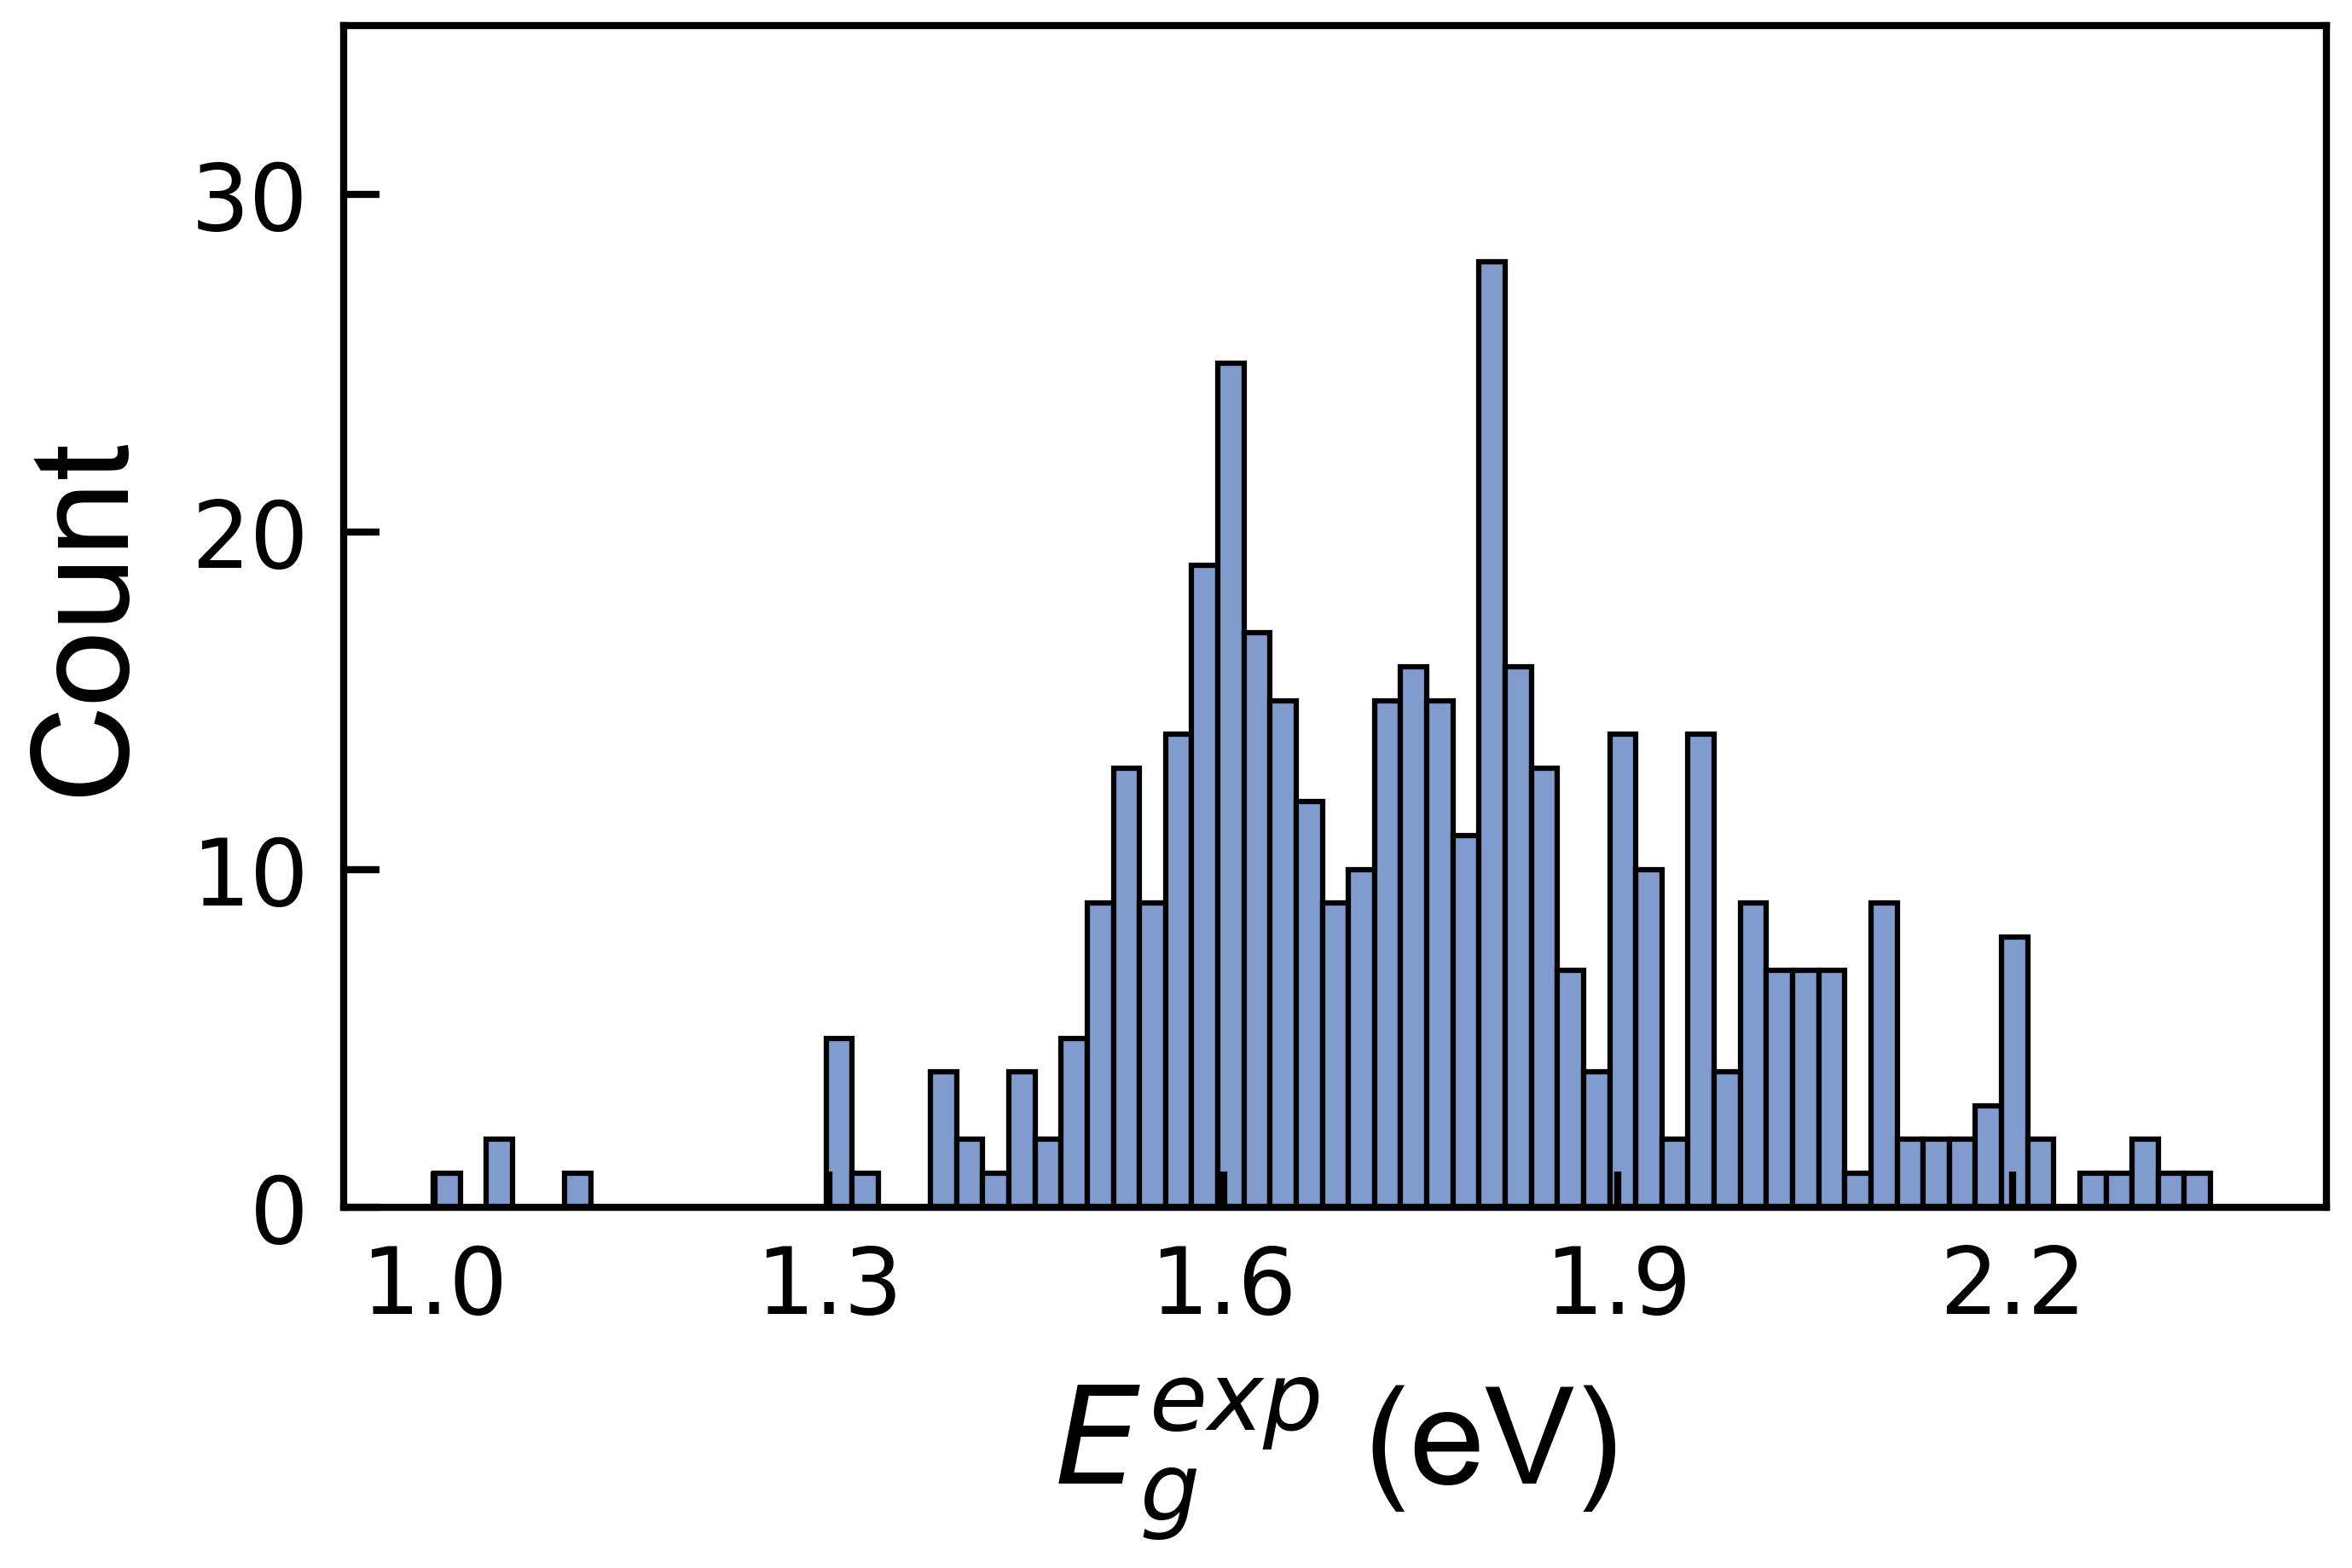

In [34]:
xticks=[1, 1.3, 1.6, 1.9, 2.2]
yticks = [0, 10, 20, 30]
yscale =[0, 35]
xlabel='$E_{g}^{exp}$ (eV)'
hist_plot(df[df['others']==1], 'bandgap(eV)', xticks, yticks, xlabel, yscale)

In [36]:
df.to_csv('building-block-acceptor.csv', index= False)

## contain multiple types of acceptor units

In [37]:
df['multi_unit'] = 0

for i in range(df.shape[0]):
    s = df.iloc[i,-3] + df.iloc[i,-4] + df.iloc[i,-5] + df.iloc[i, -6]
    if s>1:  ### does not contain at least one type of donor unit
        df.iloc[i,-1]=1

In [38]:
df[df['multi_unit']==1]

,Nickname,bandgap(eV),c_smiles,newSMILES,Ref.No,bt,dpp,qa,tpd,others,multi_unit
187,P1,1.50,CCCCCCCCCCC(CCCCCCCC)CN1C(=O)c2nc3c(nc2C1=O)c1...,CN1C(=O)c2nc3c4sc(C)cc4c4cc(sc4c3nc2C1=O)-c1cc...,S471,1,0,1,0,0,1
654,PBDT-DTQx,1.38,CCCCCCCCCCCCOc1c2cc(-c3ccc(-c4c5nsnc5c(-c5ccc(...,COc1c2cc(sc2c(OC)c2cc(C)sc12)-c1ccc(s1)-c1c2ns...,S244,1,0,1,0,0,1
707,P3,1.10,CCCCCCC(CCCC)COc1ccc(N(c2ccc(OCC(CCCC)CCCCCC)c...,Cc1ccc(s1)-c1c2nsnc2c(-c2ccc(s2)-c2ccc3c(c2)n(...,S21,1,0,1,0,0,1
880,reg-PDPP/TPDalt2T,1.42,CCCCCCCCC(CCCCCC)CN1C(=O)C2=C(c3ccc(-c4ccc(-c5...,CN1C(C)=C2C(=O)N(C)C(=C2C1=O)c1ccc(s1)-c1ccc(s...,S94,0,1,0,1,0,1
968,P2,1.28,CCCCCCCCCCC(CCCCCCCC)CN1C(=O)C2=C(c3ccc(-c4ccc...,CN1C(C)=C2C(=O)N(C)C(=C2C1=O)c1ccc(s1)-c1ccc(s...,S492,1,1,0,0,0,1
969,P3,1.21,CCCCCCCCCCC(CCCCCCCC)CN1C(=O)C2=C(c3ccc(-c4ccc...,CN1C(C)=C2C(=O)N(C)C(=C2C1=O)c1ccc(s1)-c1ccc(s...,S492,1,1,0,0,0,1
995,P,1.12,CCCCCCCCCCCCC1(CCCCCCCCCCCC)c2ccc(-c3nc4c(C)c5...,Cc1ccc(s1)-c1ccc(-c2ccc(s2)-c2c3nsnc3c(-c3ccc(...,S475,1,0,1,0,0,1
1002,P4,1.22,CCCCCCCCCCC(CCCCCCCC)CN1C(=O)C2=C(c3ccc(-c4sc(...,CN1C(C)=C2C(=O)N(C)C(=C2C1=O)c1ccc(s1)-c1sc(cc...,S492,0,1,0,1,0,1
1014,P2,1.90,CCCCCCCCCCCCOc1c2cc(-c3sc(-c4c5nc(C)c(C)nc5c(-...,COc1c2cc(C)sc2c(OC)c2cc(sc12)-c1sc(cc1C)-c1c2n...,S425,1,0,1,0,0,1
1034,P1,1.23,CCCCCCCCCCC(CCCCCCCC)CN1C(=O)C2=C(c3ccc(-c4ccc...,CN1C(C)=C2C(=O)N(C)C(=C2C1=O)c1ccc(s1)-c1ccc(s...,S492,0,1,0,1,0,1


In [39]:
df[df['multi_unit']==1].shape

(13, 11)

In [40]:
c_smiles = df[df['multi_unit']==1]['c_smiles'].to_list()
idx_list = df[df['multi_unit']==1].index.to_list()
len(idx_list)

13

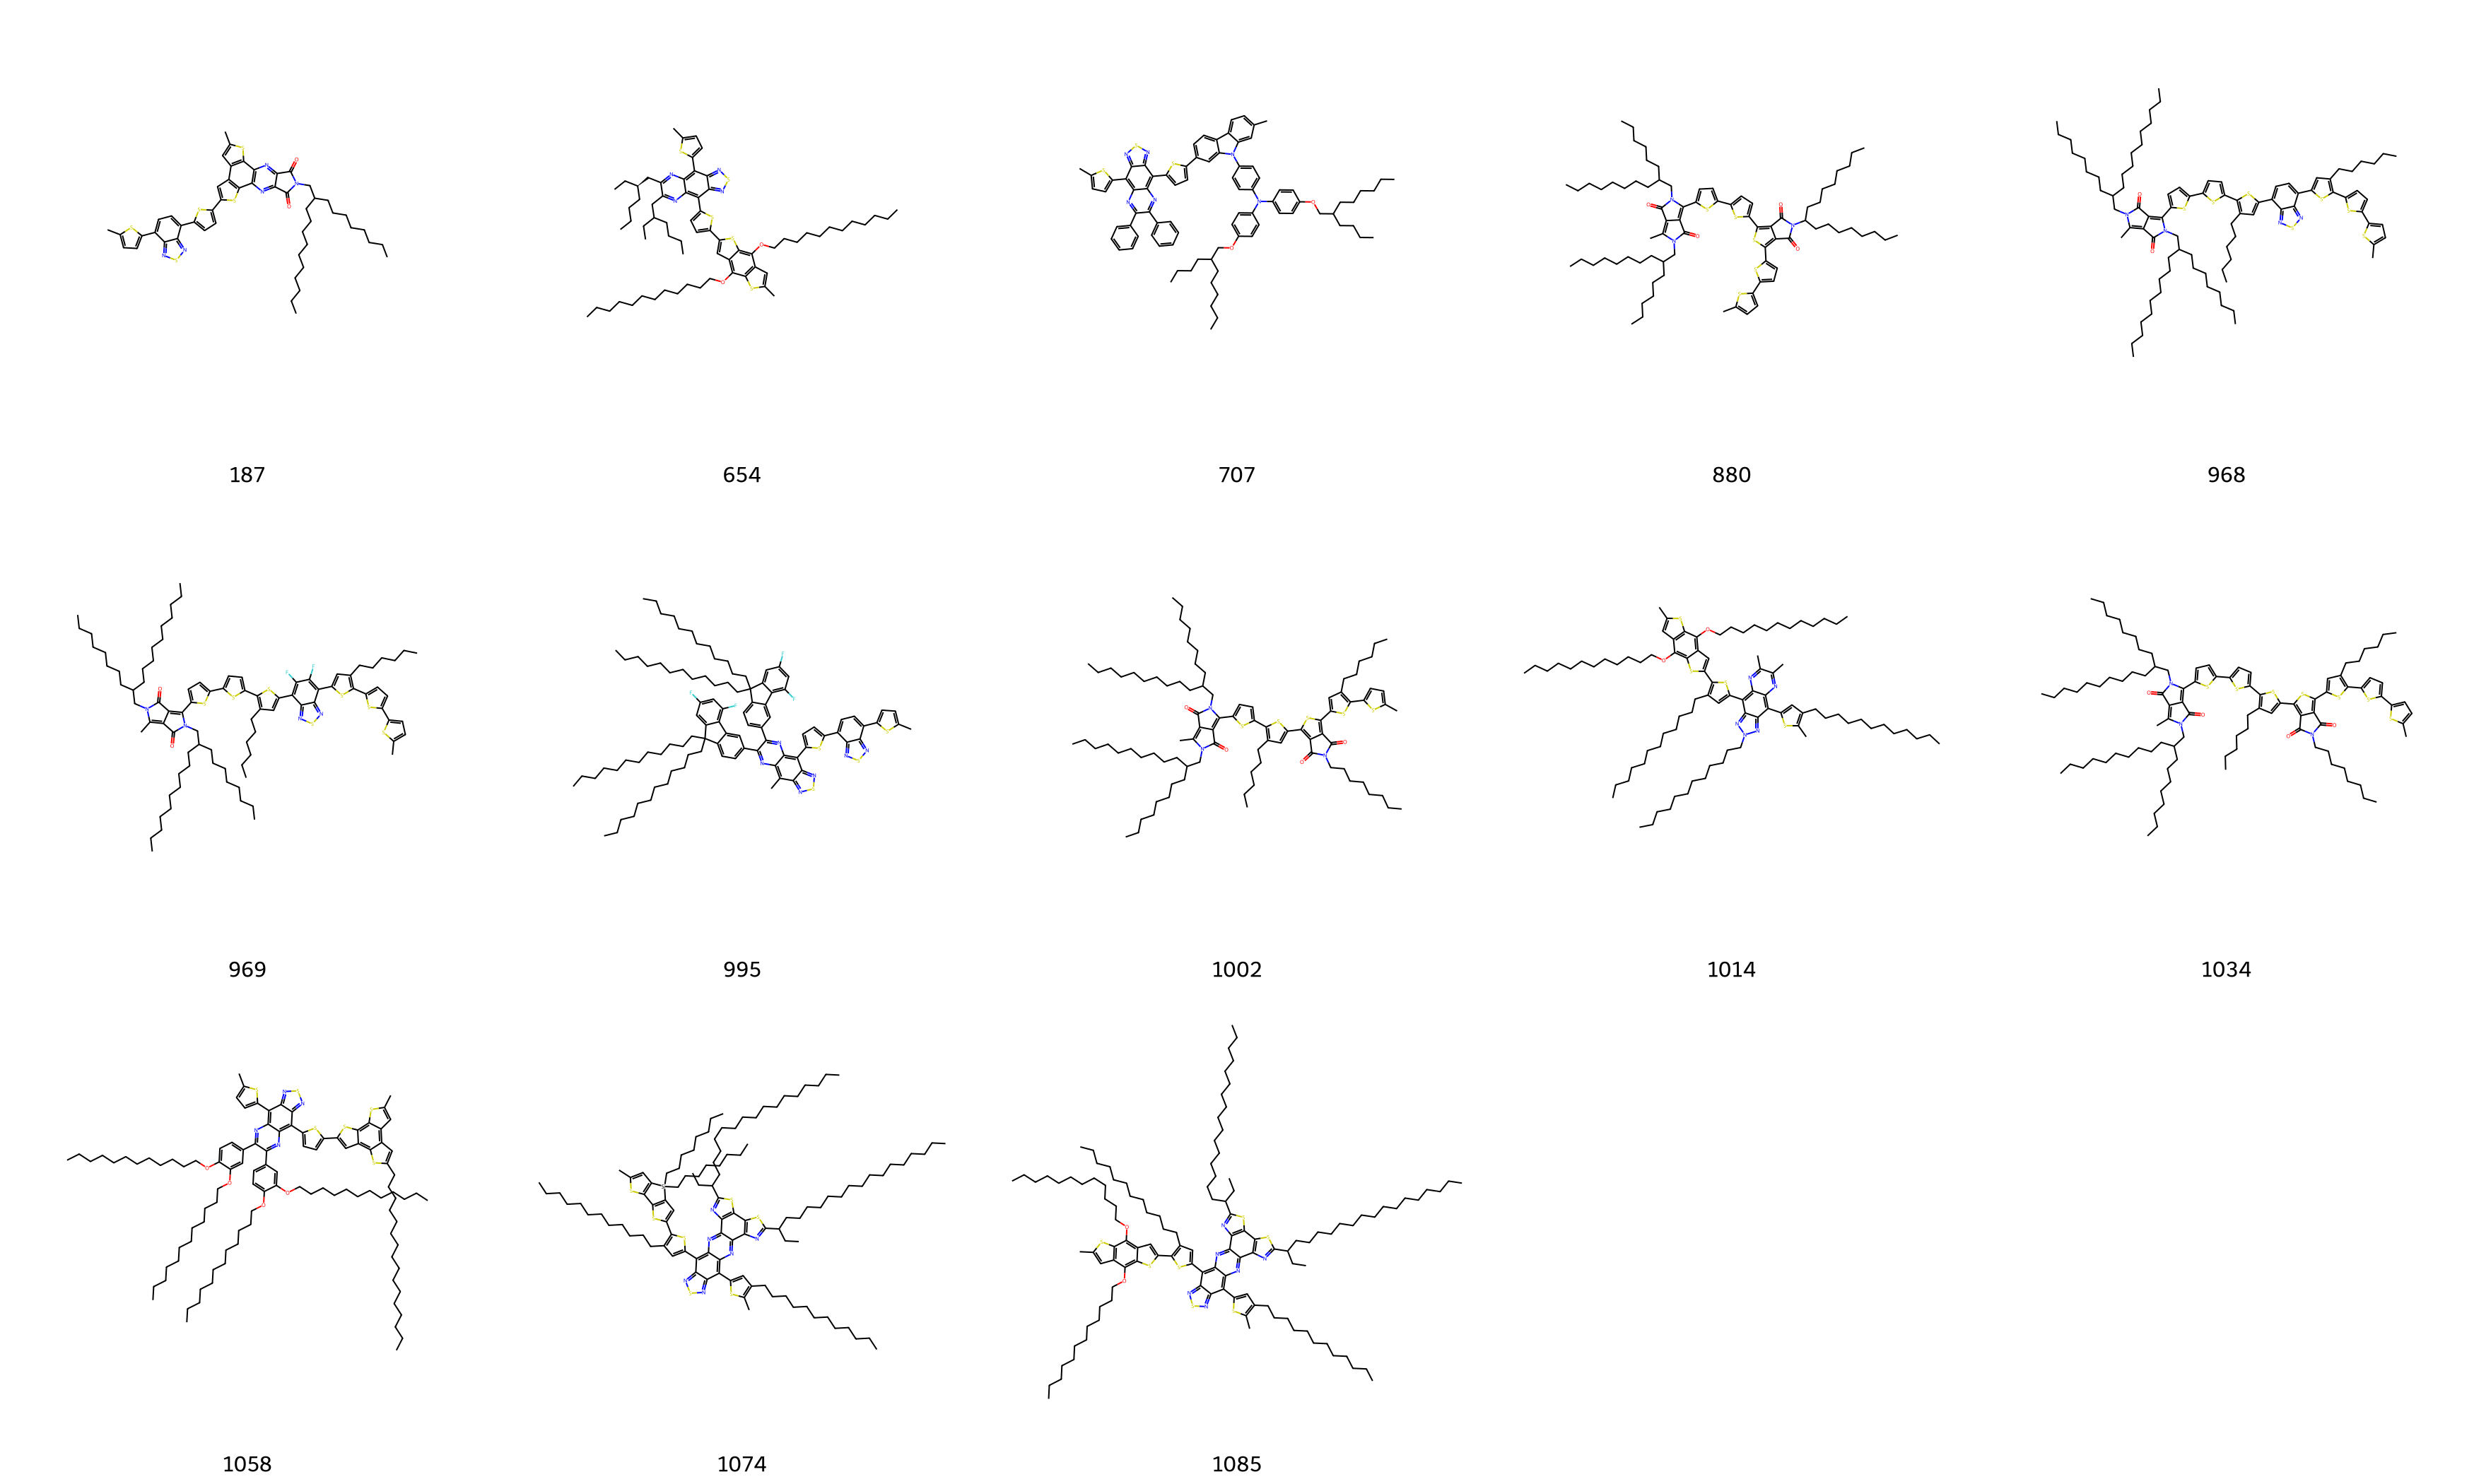

In [41]:
interval = 40
# 创建一个绘图选项对象
options = Draw.MolDrawOptions()
options.legendFontSize = 30
for i in range(0,len(c_smiles),interval):
    if (i+interval) <= len(c_smiles):
        sample_smiles = c_smiles[i:i+interval]
    else:
        sample_smiles = c_smiles[i:len(c_smiles)]
    sample_mols = [Chem.MolFromSmiles(smiles) for smiles in sample_smiles]
#     label = idx_list[i:i+40]
    label = list(map(str, idx_list[i:i+40]))
    grid = Draw.MolsToGridImage(sample_mols,
                               molsPerRow=5,
                               subImgSize=(700,700),
                                legends = label,
                                drawOptions=options,
#                                useSVG=True
                               )
grid